CTD comparisons with surface wave mixing tests part 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import netCDF4 as nc
from salishsea_tools import geo_tools, tidetools, viz_tools, loadDataFRP
from matplotlib.colors import LinearSegmentedColormap
import cmocean
import pandas as pd
from IPython.display import Image

%matplotlib inline

In [2]:
stationdata, casts = loadDataFRP.loadDataFRP_SSGrid()

(40, 898, 398) 415 337 1.0
(40, 898, 398) 415 337 2.0
(40, 898, 398) 442 259 3.0


/home/vdo/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3883: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  check = self.filled(0).__eq__(other)


(40, 898, 398) 438 268 4.0
(40, 898, 398) 434 278 5.0
(40, 898, 398) 432 281 6.0
(40, 898, 398) 430 285 7.0
(40, 898, 398) 428 289 8.0
(40, 898, 398) 427 291 9.0
(40, 898, 398) 412 291 10.0
(40, 898, 398) 443 258 11.0
(40, 898, 398) 438 268 12.0
(40, 898, 398) 434 278 13.0
(40, 898, 398) 432 281 14.1
(40, 898, 398) 432 281 14.2
(40, 898, 398) 432 287 15.0
(40, 898, 398) 432 292 16.0
(40, 898, 398) 427 291 17.0
(40, 898, 398) 415 337 18.0


In [3]:
Bathymetry = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(Bathymetry)

In [4]:
stationdata.keys()

Index(['Station', 'Date', 'Date_UTC', 'Time_UTC_hhmmss', 'Time_UTC_DecDay',
       'LatDecDeg', 'LonDecDeg', 'LatDecDeg_surface', 'LonDecDeg_surface',
       'LatDecDeg_bottom', 'LonDecDeg_bottom', 'LatDecDeg_surf2',
       'LonDecDeg_surf2', 'LatDecDeg_Niskin', 'LonDecDeg_Niskin',
       'LatDecDeg_end', 'LonDecDeg_end', 'Sounding', 'MaxWireOut_m',
       'waveHeightEst_m', 'cloudyPct', 'filename', 'time_PDT_hhmmss',
       'time_PDT_decDay', 'time_on_PDT_hhmmss', 'time_on_PDT_decDay',
       'time_surface_PDT_hhmmss', 'time_surface_PDT_decDay',
       'time_bottom_PDT_hhmmss', 'time_bottom_PDT_decDay',
       'time_surf2_PDT_hhmmss', 'time_Niskin_PDT_hhmmss',
       'time_off_PDT_hhmmss', 'SecchiDepth_m', 'BottleLetter', 'ALS_Turb_NTU',
       'ALS_TSS_mgL', 'sb19Turb_uncorrected', 'sb19Sal', 'sb25Sal',
       'ishift_sub19', 'pStart25', 'pEnd25'],
      dtype='object')

In [5]:
stationdata[['Station','Date_UTC','Time_UTC_hhmmss','LatDecDeg','LonDecDeg']]

Station  Date_UTC Time_UTC_hhmmss  LatDecDeg   LonDecDeg
0       1.0  20170410        17:54:17  49.148333 -123.040000
1       2.0  20170410        18:05:11  49.148333 -123.040000
2       3.0  20170410        19:44:22  49.099983 -123.526600
3       4.0  20170410        20:25:40  49.100383 -123.467017
4       5.0  20170410        21:05:12  49.100583 -123.400417
5       6.0  20170410        21:40:15  49.100500 -123.375500
6       7.0  20170410        21:58:48  49.100000 -123.350000
7       8.0  20170410        22:30:56  49.100333 -123.324667
8       9.0  20170410        22:45:20  49.101500 -123.309000
9      10.0  20170531        17:19:23  49.039500 -123.259650
10     11.0  20170531        18:13:05  49.100810 -123.533720
11     12.0  20170531        18:51:36  49.101080 -123.467220
12     13.0  20170531        19:24:38  49.100370 -123.400120
13     14.1  20170531        19:50:40  49.100850 -123.375670
14     14.2  20170531        19:53:25  49.102620 -123.377670
15     15.0  20170531        20:12:26  49.110550 -123.348520
16     16.0  20170531        20:41:47  49.120700 -123.318500
17     17.0  20170531        21:01:03  49.101680 -123.308830
18     18.0  20170531        22:05:25  49.148290 -123.039280

In [6]:
Bathymetry = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [7]:
bathy, X, Y = tidetools.get_bathy_data(Bathymetry)

In [8]:
stationdata.iloc[[2]]

Station      Date  Date_UTC Time_UTC_hhmmss  Time_UTC_DecDay  LatDecDeg  \
2      3.0  20170410  20170410        19:44:22         0.822477  49.099983   

   LonDecDeg  LatDecDeg_surface  LonDecDeg_surface  LatDecDeg_bottom   ...    \
2  -123.5266                NaN                NaN               NaN   ...     

   SecchiDepth_m  BottleLetter  ALS_Turb_NTU  ALS_TSS_mgL  \
2            3.0             B           2.4          8.9   

   sb19Turb_uncorrected   sb19Sal   sb25Sal  ishift_sub19  pStart25  pEnd25  
2                54.055  25.84535  25.84735             9       599    1939  

[1 rows x 43 columns]

In [9]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
tmask = mesh.variables['tmask'][:]

In [70]:
f = nc.Dataset('/data/eolson/MEOPAR/SS36runs/OrcinusRuns/SMELTNewLight10d_r5/SalishSea_1h_20150407_20150416_grid_T.nc')

In [11]:
f_sals = f.variables['vosaline'][72:96,...]
f_temps = f.variables['votemper'][72:96,...]

In [12]:
def where(station):
    fig, ax = plt.subplots(figsize = (5,5))
    viz_tools.plot_coastline(ax, Bathymetry, coords = 'map')
    ax.plot(station['LonDecDeg'].values[0], station['LatDecDeg'].values[0], 'r*')

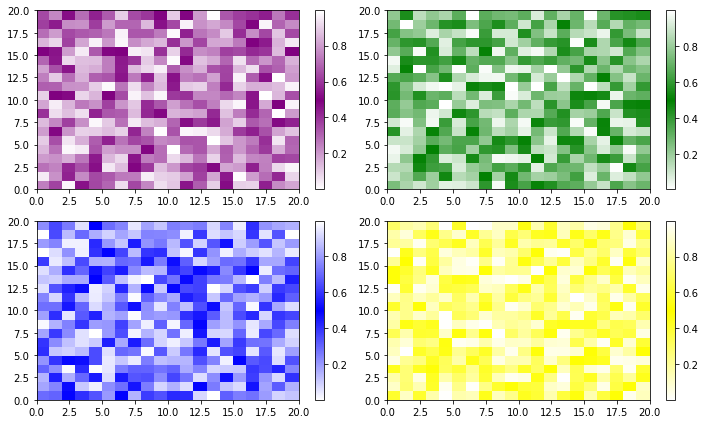

In [13]:
vmax = 1.0
cmap1 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'purple'),
                                                     (1 / vmax, 'white')])
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'blue'),
                                                     (1 / vmax, 'white')])
cmap3 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'green'),
                                                     (1 / vmax, 'white')])
cmap4 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'yellow'),
                                                     (1 / vmax, 'white')])
fig, ax = plt.subplots(2,2, figsize = (10,6))
mesh1 = ax[0,0].pcolormesh(np.random.random((20,20)), cmap = cmap1)
cbar1 = fig.colorbar(mesh1, ax=ax[0,0])
mesh1 = ax[1,0].pcolormesh(np.random.random((20,20)), cmap = cmap2)
cbar1 = fig.colorbar(mesh1, ax=ax[1,0])
mesh1 = ax[0,1].pcolormesh(np.random.random((20,20)), cmap = cmap3)
cbar1 = fig.colorbar(mesh1, ax=ax[0,1])
mesh1 = ax[1,1].pcolormesh(np.random.random((20,20)), cmap = cmap4)
cbar1 = fig.colorbar(mesh1, ax=ax[1,1])
fig.tight_layout()

In [14]:
purples = cmap1(np.linspace(0,1,7))
blues = cmap2(np.linspace(0,1,7))
greens = cmap3(np.linspace(0,1,7))
aquas = cmap4(np.linspace(0,1,7))

In [15]:
stationdata.iloc[[2]]

Station      Date  Date_UTC Time_UTC_hhmmss  Time_UTC_DecDay  LatDecDeg  \
2      3.0  20170410  20170410        19:44:22         0.822477  49.099983   

   LonDecDeg  LatDecDeg_surface  LonDecDeg_surface  LatDecDeg_bottom   ...    \
2  -123.5266                NaN                NaN               NaN   ...     

   SecchiDepth_m  BottleLetter  ALS_Turb_NTU  ALS_TSS_mgL  \
2            3.0             B           2.4          8.9   

   sb19Turb_uncorrected   sb19Sal   sb25Sal  ishift_sub19  pStart25  pEnd25  
2                54.055  25.84535  25.84735             9       599    1939  

[1 rows x 43 columns]

In [16]:
def compare(station, tmask):
    cast = casts[station['Station'].values[0]]
    Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                    station['LatDecDeg'].values[0],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsbase_2/test4/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa_2/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb_2/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsbase_2/test9/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa_2/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb_2/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    shape_depth = cast.dCast['depth_m'].values.shape[0]
    if shape_depth > 11:
        fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
        deptht = cast.dCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,0].plot(cast_sal_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,0].plot(cast_sal_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,1].plot(cast_temp_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,1].plot(cast_temp_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2])
        n = 1
        for j in range(Yind - 2, Yind + 3):
            pt_mask = tmask[0,:shape_depth,j,Xind]
            masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            if station['Date'].values == 20170410:
                f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,j, Xind]
                                       +(1-delta)*f_sals[before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
                f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,j, Xind]
                                        +(1-delta)*f_temps[before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
                ax[0,0].plot(f_sal[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1,0].plot(f_sal[11:], deptht[11:], color = aquas[n], alpha = 0.6)
                ax[0,1].plot(f_temp[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1,1].plot(f_temp[11:], deptht[11:], color = aquas[n], alpha = 0.6)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
            ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[n], alpha = 0.6)
            ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[n], alpha = 0.6)
            ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
            ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[n], alpha = 0.6)
            ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[n], alpha = 0.6)
            ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
            ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[n], alpha = 0.6)
            ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[n], alpha = 0.6)
            ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
            ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[n], alpha = 0.6)
            ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[n], alpha = 0.6)
            n = n + 1
        m = 1
        for i in range(Xind - 2, Xind + 3):
            pt_mask = tmask[0,:shape_depth,Yind,i]
            masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            if station['Date'].values == 20170410:
                f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,Yind, i]
                                       +(1-delta)*f_sals[before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
                f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, i]
                                        +(1-delta)*f_temps[before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
                ax[0,0].plot(f_sal[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1,0].plot(f_sal[11:], deptht[11:], color = aquas[n], alpha = 0.6)
                ax[0,1].plot(f_temp[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1,1].plot(f_temp[11:], deptht[11:], color = aquas[n], alpha = 0.6)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
            ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[m], alpha = 0.6)
            ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[m], alpha = 0.6)
            ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
            ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[m], alpha = 0.6)
            ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[m], alpha = 0.6)
            ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
            ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[m], alpha = 0.6)
            ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[m], alpha = 0.6)
            ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
            ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[m], alpha = 0.6)
            ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[m], alpha = 0.6)
            m = m + 1
    else:
        fig, ax = plt.subplots(1,2,figsize = (8,10) )
        deptht = cast.uCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0].plot(cast_sal_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[0].plot(cast_sal_up[:], deptht[:], color='deeppink', alpha = 0.6)
        ax[1].plot(cast_temp_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[1].plot(cast_temp_up[:], deptht[:], color='deeppink', alpha = 0.6)
        if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2])
        n = 1
        for j in range(Yind - 2, Yind + 3):
            pt_mask = tmask[0,:shape_depth,j,Xind]
            masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            if station['Date'].values == 20170410:
                f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,j, Xind]
                                       +(1-delta)*f_sals[before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
                f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,j, Xind]
                                        +(1-delta)*f_temps[before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
                ax[0].plot(f_sal[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1].plot(f_temp[:11], deptht[:11], color = aquas[n], alpha = 0.6)
            ax[0].plot(base_sal, deptht, color = purples[n], alpha = 0.6)
            ax[0].plot(a_sal, deptht, color = blues[n], alpha = 0.6)
            ax[0].plot(b_sal, deptht, color= greens[n], alpha = 0.6)
            ax[1].plot(base_temp, deptht, color = purples[n], alpha = 0.6)
            ax[1].plot(a_temp, deptht, color = blues[n], alpha = 0.6)
            ax[1].plot(b_temp, deptht, color = greens[n], alpha = 0.6)
            n = n + 1
        m = 1
        for i in range(Xind - 2, Xind + 3):
            pt_mask = tmask[0,:shape_depth,Yind,i]
            masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            if station['Date'].values == 20170410:
                f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,Yind, i]
                                       +(1-delta)*f_sals[before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
                f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, i]
                                        +(1-delta)*f_temps[before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
                ax[0].plot(f_sal[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1].plot(f_temp[:11], deptht[:11], color = aquas[n], alpha = 0.6)
            ax[0].plot(base_sal, masked_depth, color = purples[m], alpha = 0.6)
            ax[0].plot(a_sal, masked_depth, color = blues[m], alpha = 0.6)
            ax[0].plot(b_sal, masked_depth, color= greens[m], alpha = 0.6)
            ax[1].plot(base_temp, masked_depth, color = purples[m], alpha = 0.6)
            ax[1].plot(a_temp, masked_depth, color = blues[m], alpha = 0.6)
            ax[1].plot(b_temp, masked_depth, color = greens[m], alpha = 0.6)
            m = m + 1
    min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
    max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                  np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
    min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                 np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
    max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                 np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
    if station['Date'].values == 20170410:
        min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal),
                                     np.nanmin(f_sal)]))
        max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                      np.nanmax(base_sal), np.nanmax(a_sal), 
                                      np.nanmax(b_sal), np.nanmax(f_sal)]))
        min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                     np.nanmin(base_temp),np.nanmin(a_temp), 
                                       np.nanmin(b_temp), np.nanmin(f_temp)]))
        max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                     np.nanmax(base_temp),np.nanmax(a_temp), 
                                       np.nanmax(b_temp), np.nanmax(f_temp)]))
    if shape_depth > 11:
        ax[0,0].set_ylim(11,0)
        ax[0,1].set_ylim(11,0)
        ax[1,0].set_ylim(100,12)
        ax[1,1].set_ylim(100,12)
        ax[0,0].set_xlim(min_sal-1,max_sal+1)
        ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[1,0].set_xlim(min_sal-1,max_sal+1)
        ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0,0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[0,1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0,0].tick_params(labelbottom='off')
        ax[0,1].tick_params(labelbottom='off')
        ax[0,0].grid('on')
        ax[0,1].grid('on')
        ax[1,0].grid('on')
        ax[1,1].grid('on')
    else:
        ax[0].set_ylim(11,0)
        ax[1].set_ylim(11,0)
        ax[0].set_xlim(min_sal-1,max_sal+1)
        ax[1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0].grid('on')
        ax[1].grid('on')
    fig.tight_layout()
    return ax

In [25]:
def compare_closest(station, tmask):
    cast = casts[station['Station'].values[0]]
    Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                    station['LatDecDeg'].values[0],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsbase_2/test4/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa_2/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb_2/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsbase_2/test9/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa_2/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb_2/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    shape_depth = cast.dCast['depth_m'].values.shape[0]
    if shape_depth > 11:
        fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
        deptht = cast.dCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,0].plot(cast_sal_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,0].plot(cast_sal_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,1].plot(cast_temp_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,1].plot(cast_temp_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2])
        pt_mask = tmask[0,:shape_depth,Yind,Xind]
        masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
        base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                      + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                      mask = 1-pt_mask)
        a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                       +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                       mask = 1-pt_mask)
        a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        if station['Date'].values == 20170410:
            f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,Yind, Xind]
                                   +(1-delta)*f_sals[before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
            f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, Xind]
                                    +(1-delta)*f_temps[before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
            ax[0,0].plot(f_sal[:11], deptht[:11], color = 'yellow', alpha = 0.6)
            ax[1,0].plot(f_sal[11:], deptht[11:], color = 'yellow', alpha = 0.6)
            ax[0,1].plot(f_temp[:11], deptht[:11], color = 'yellow', alpha = 0.6)
            ax[1,1].plot(f_temp[11:], deptht[11:], color = 'yellow', alpha = 0.6)
        ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)
        ax[0,0].plot(a_sal[:11], deptht[:11], color = 'blue', alpha = 0.6)
        ax[0,0].plot(b_sal[:11], deptht[:11], color= 'green', alpha = 0.6)
        ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
        ax[1,0].plot(a_sal[11:], deptht[11:], color = 'blue', alpha = 0.6)
        ax[1,0].plot(b_sal[11:], deptht[11:], color= 'green', alpha = 0.6)
        ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
        ax[0,1].plot(a_temp[:11], deptht[:11], color = 'blue', alpha = 0.6)
        ax[0,1].plot(b_temp[:11], deptht[:11], color = 'green', alpha = 0.6)
        ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
        ax[1,1].plot(a_temp[11:], deptht[11:], color = 'blue', alpha = 0.6)
        ax[1,1].plot(b_temp[11:], deptht[11:], color = 'green', alpha = 0.6)
    else:
        fig, ax = plt.subplots(1,2,figsize = (8,10) )
        deptht = cast.uCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0].plot(cast_sal_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[0].plot(cast_sal_up[:], deptht[:], color='deeppink', alpha = 0.6)
        ax[1].plot(cast_temp_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[1].plot(cast_temp_up[:], deptht[:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2])
        pt_mask = tmask[0,:shape_depth,Yind,Xind]
        masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
        base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                      + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                      mask = 1-pt_mask)
        a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                       +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                       mask = 1-pt_mask)
        a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        if station['Date'].values == 20170410:
            f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,Yind, Xind]
                                   +(1-delta)*f_sals[before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
            f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, Xind]
                                    +(1-delta)*f_temps[before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
            ax[0].plot(f_sal, deptht, color = 'yellow', alpha = 0.6)
            ax[1].plot(f_temp, deptht, color = 'yellow', alpha = 0.6)
        ax[0].plot(base_sal, deptht, color = 'purple', alpha = 0.6)
        ax[0].plot(a_sal, deptht, color = 'blue', alpha = 0.6)
        ax[0].plot(b_sal, deptht, color= 'green', alpha = 0.6)
        ax[1].plot(base_temp, deptht, color = 'purple', alpha = 0.6)
        ax[1].plot(a_temp, deptht, color = 'blue', alpha = 0.6)
        ax[1].plot(b_temp, deptht, color = 'green', alpha = 0.6)
    min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
    max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                  np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
    min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                 np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
    max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                 np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
    if station['Date'].values == 20170410:
        min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal),
                                     np.nanmin(f_sal)]))
        max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                      np.nanmax(base_sal), np.nanmax(a_sal), 
                                      np.nanmax(b_sal), np.nanmax(f_sal)]))
        min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                     np.nanmin(base_temp),np.nanmin(a_temp), 
                                       np.nanmin(b_temp), np.nanmin(f_temp)]))
        max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                     np.nanmax(base_temp),np.nanmax(a_temp), 
                                       np.nanmax(b_temp), np.nanmax(f_temp)]))
    if shape_depth > 11:
        ax[0,0].set_ylim(11,0)
        ax[0,1].set_ylim(11,0)
        ax[1,0].set_ylim(100,12)
        ax[1,1].set_ylim(100,12)
        ax[0,0].set_xlim(min_sal-1,max_sal+1)
        ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[1,0].set_xlim(min_sal-1,max_sal+1)
        ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0,0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[0,1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0,0].tick_params(labelbottom='off')
        ax[0,1].tick_params(labelbottom='off')
        ax[0,0].grid('on')
        ax[0,1].grid('on')
        ax[1,0].grid('on')
        ax[1,1].grid('on')
    else:
        ax[0].set_ylim(11,0)
        ax[1].set_ylim(11,0)
        ax[0].set_xlim(min_sal-1,max_sal+1)
        ax[1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0].grid('on')
        ax[1].grid('on')
    fig.tight_layout()
    return ax

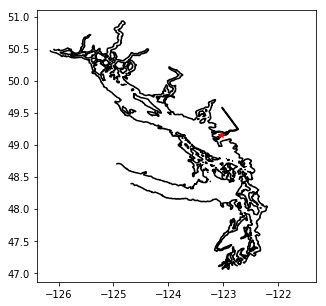

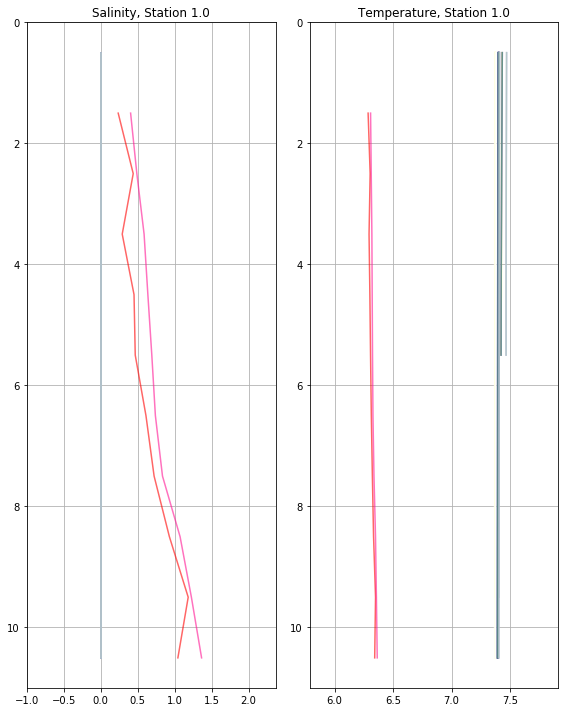

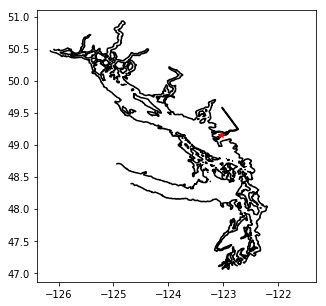

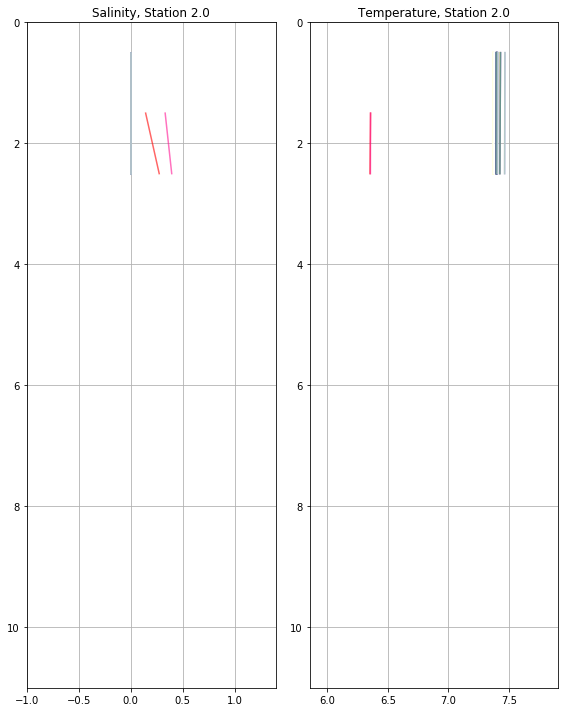

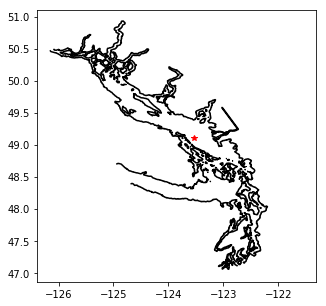

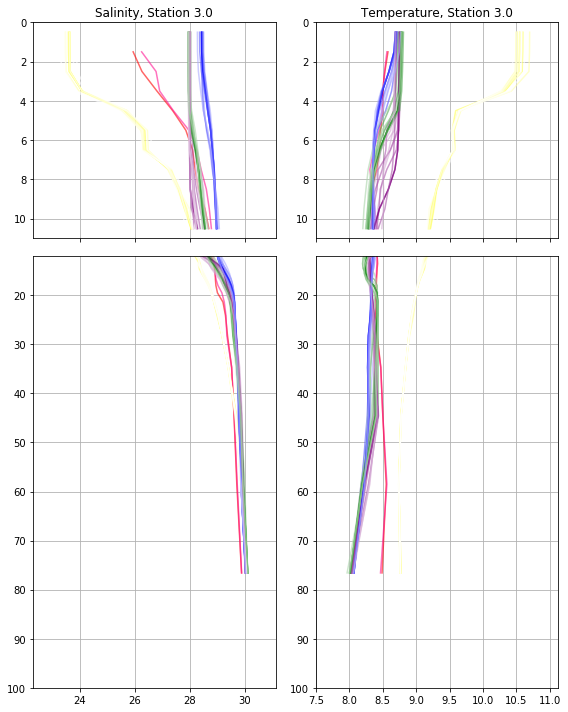

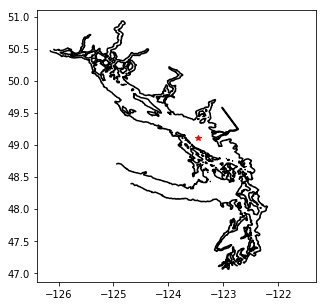

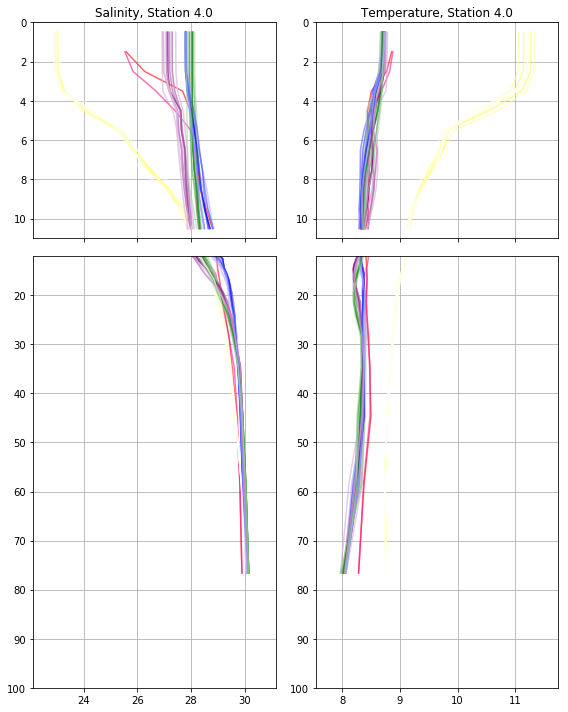

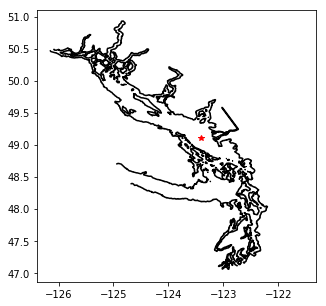

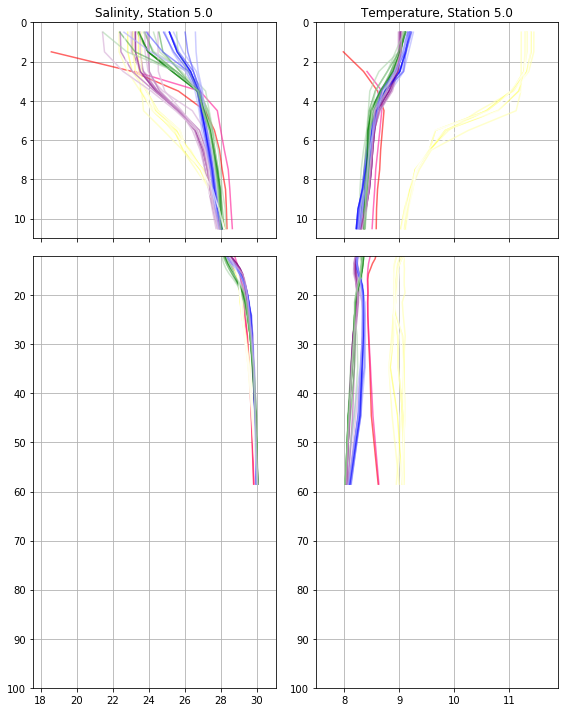

In [18]:
for n in range(5):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

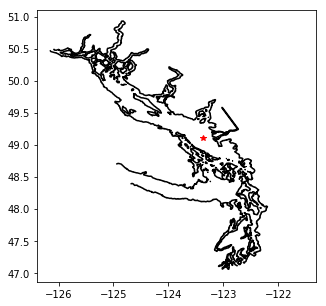

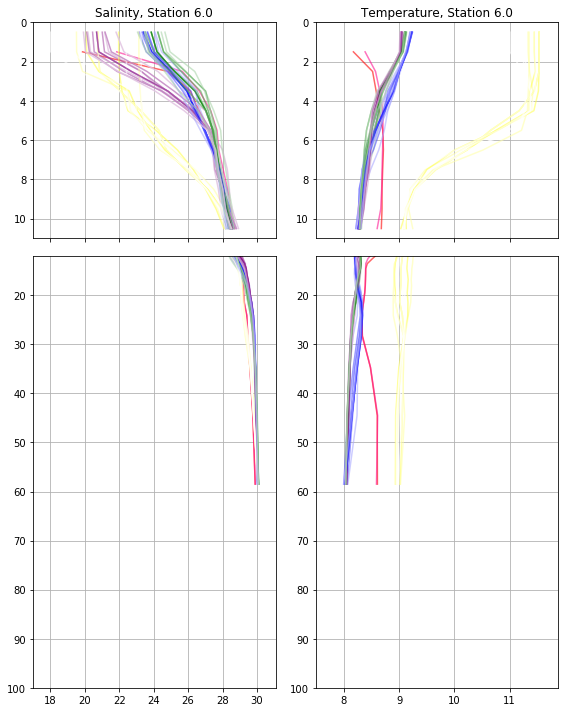

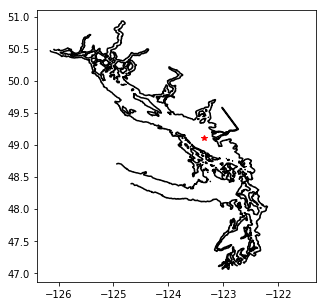

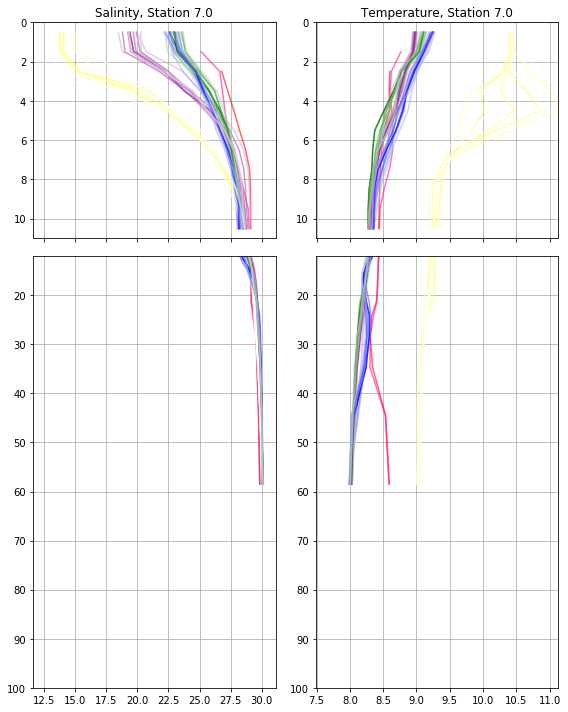

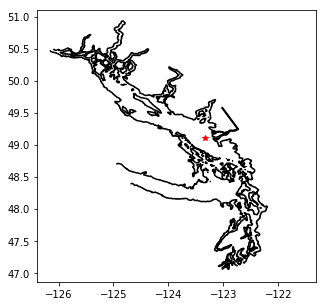

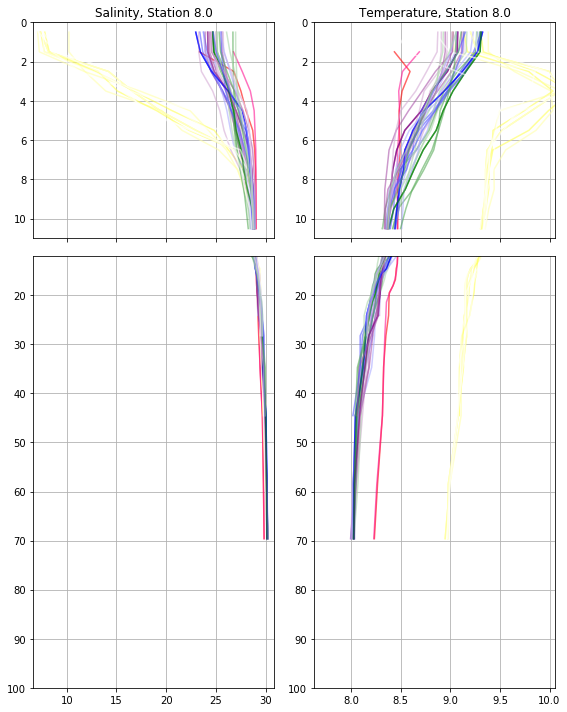

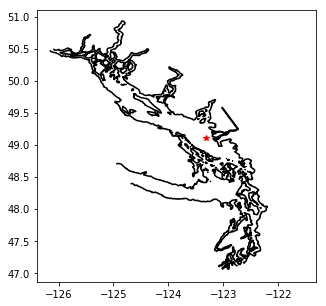

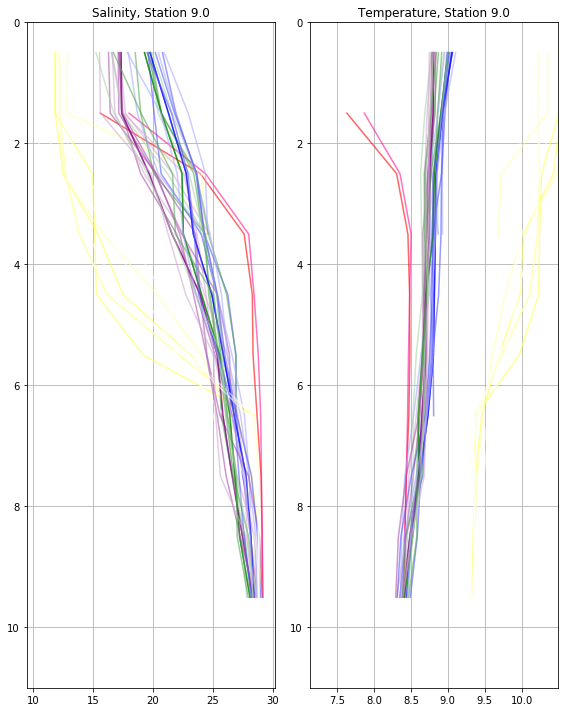

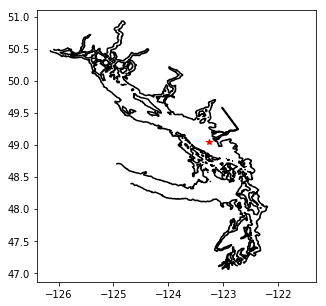

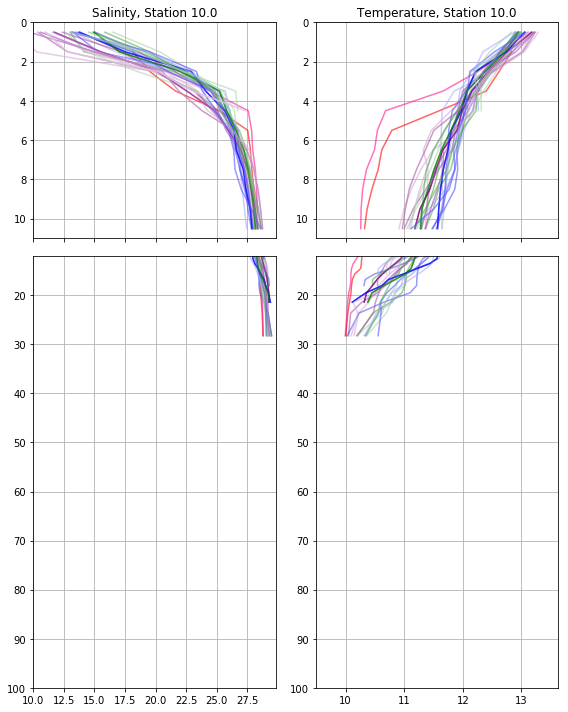

In [19]:
for n in range(5,10):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

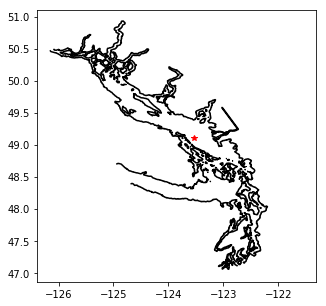

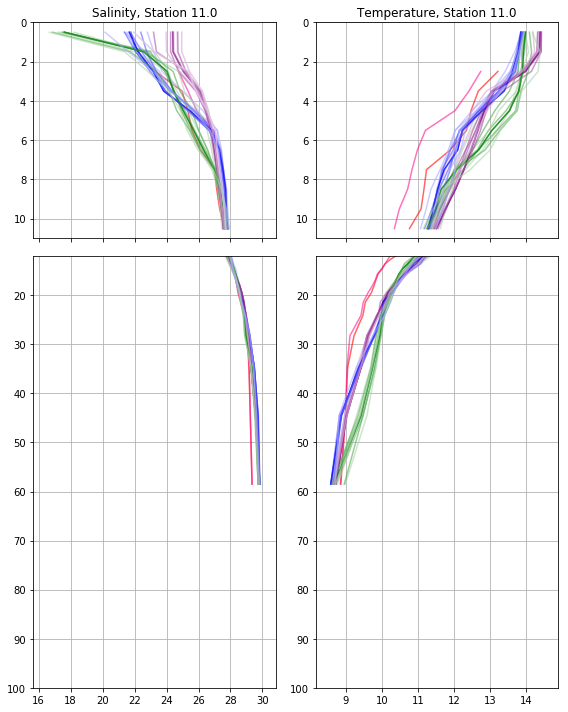

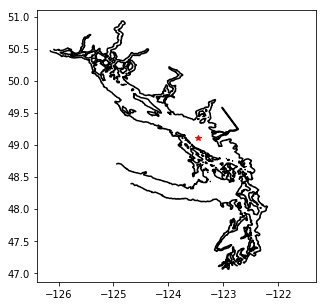

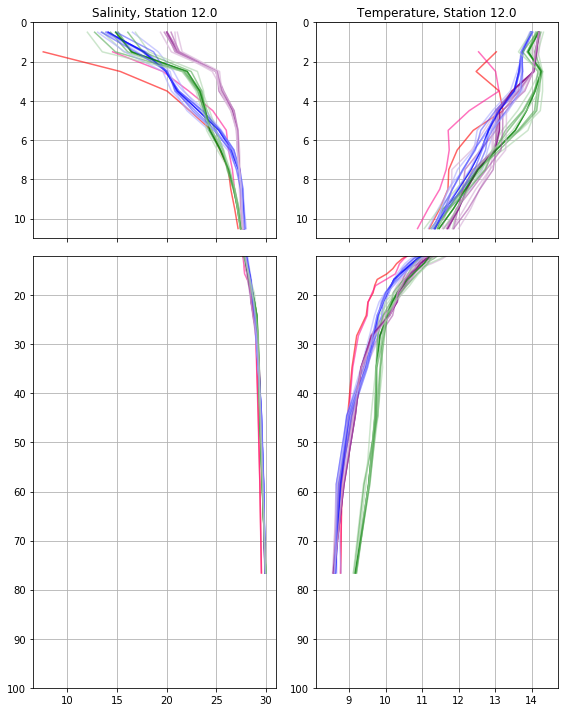

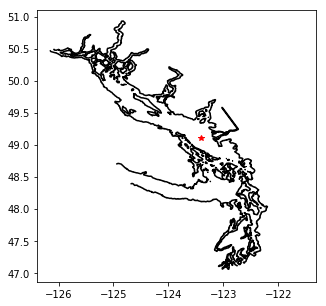

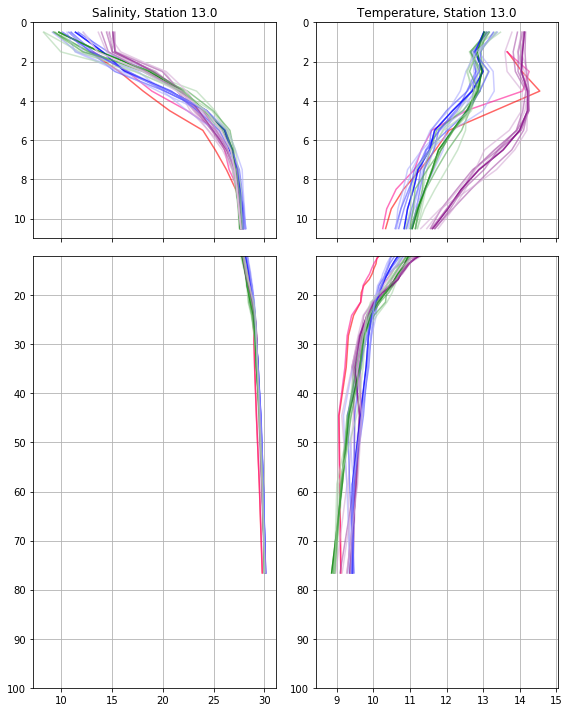

In [20]:
for n in range(10,13):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

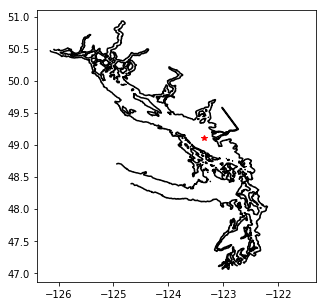

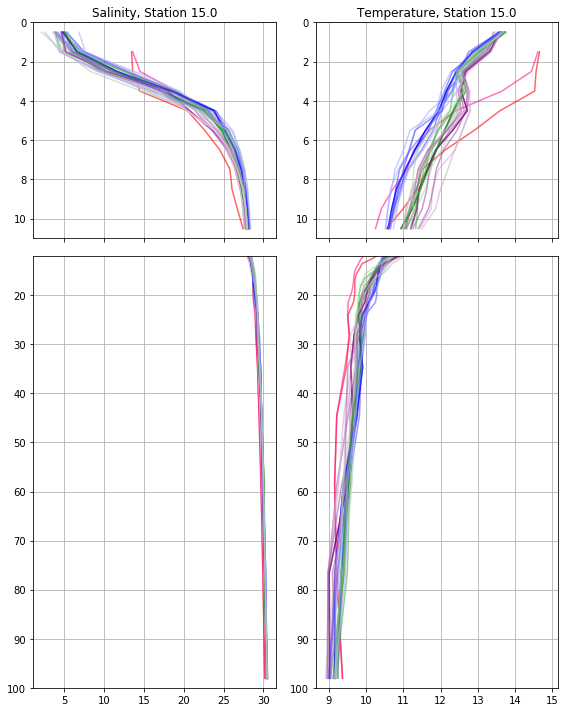

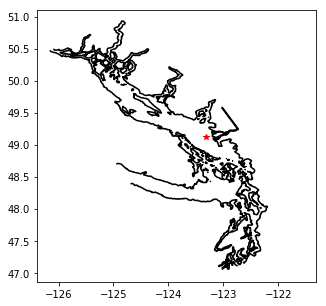

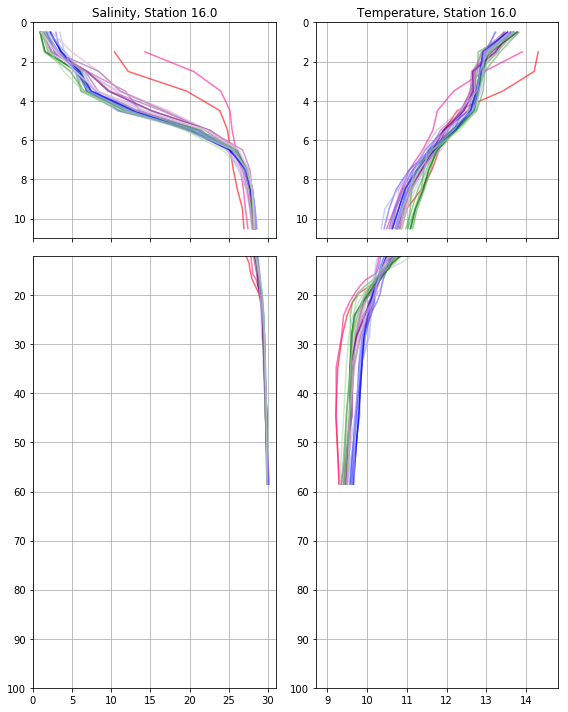

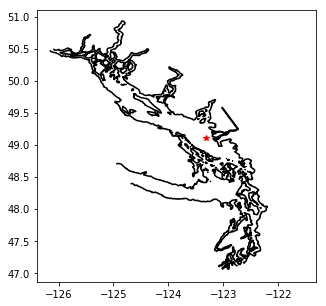

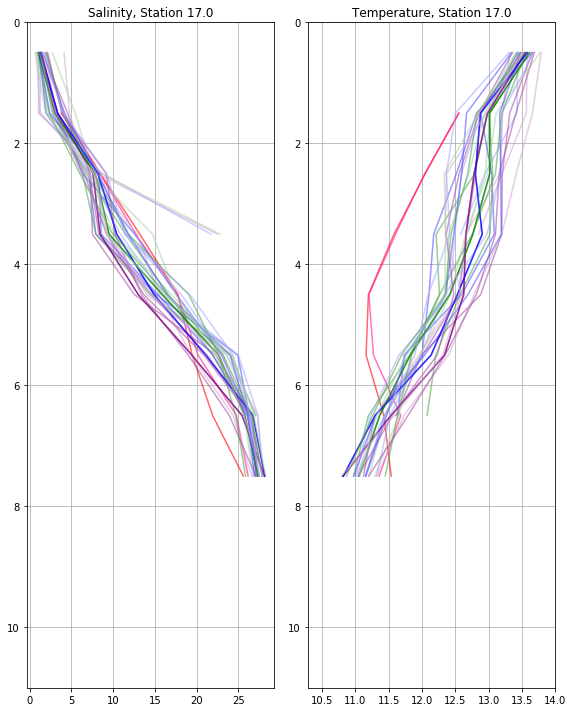

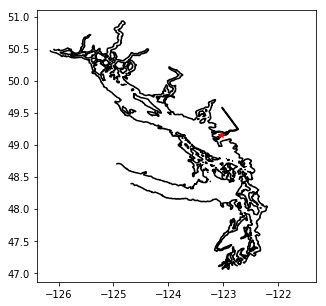

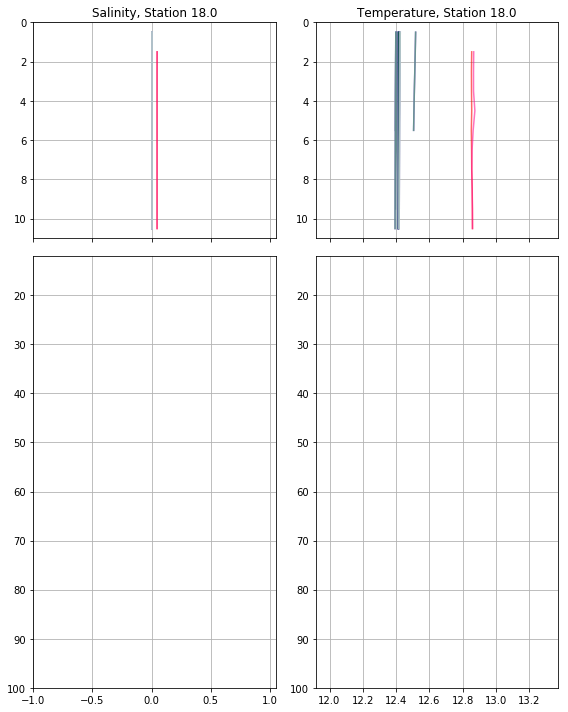

In [21]:
for n in range(15,19):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

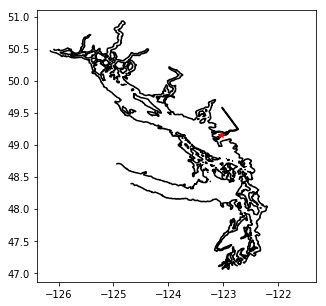

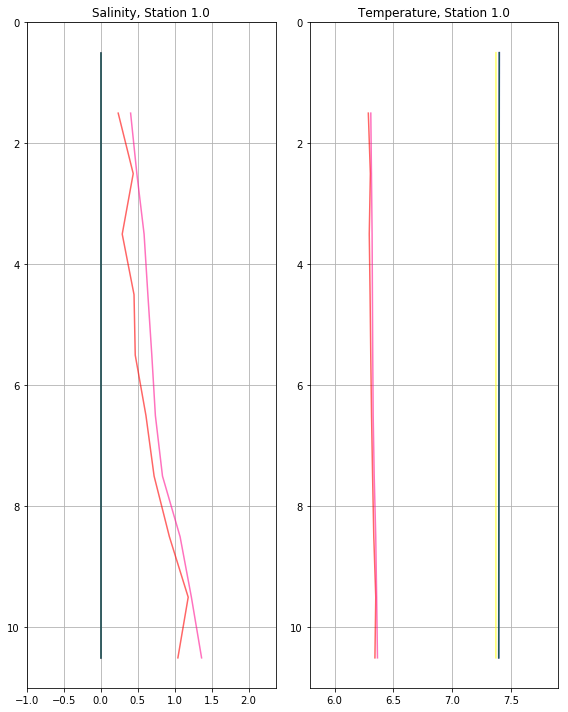

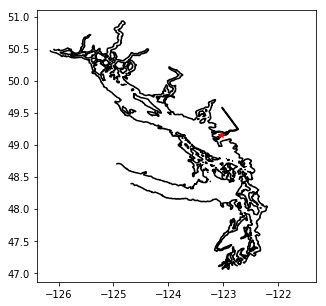

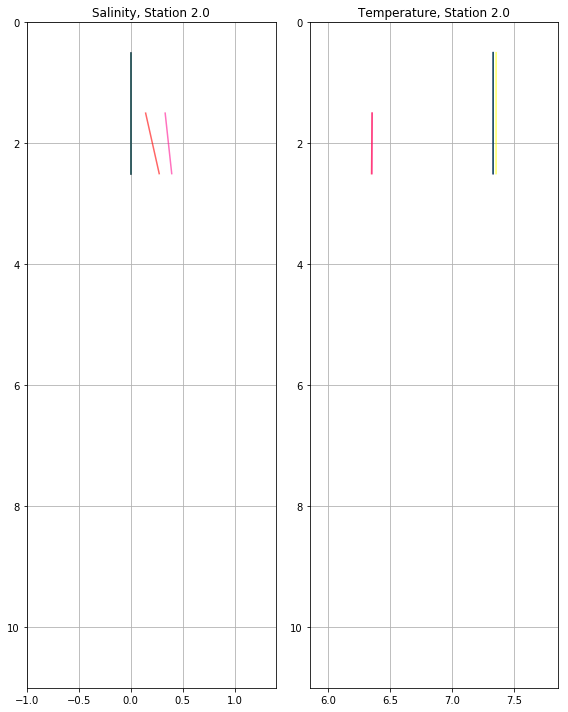

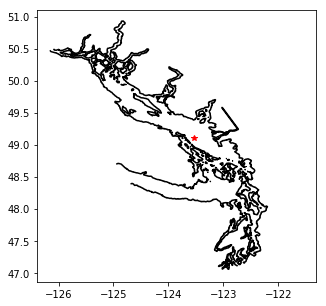

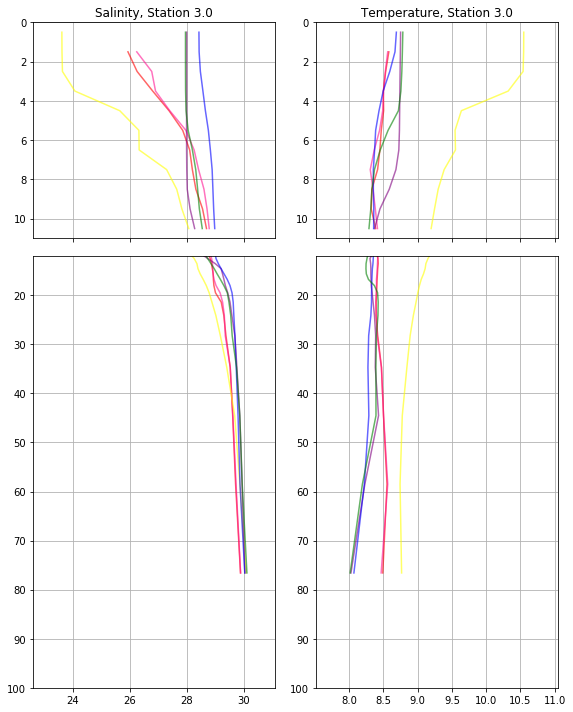

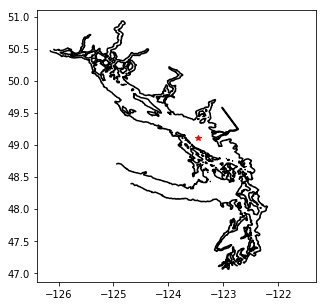

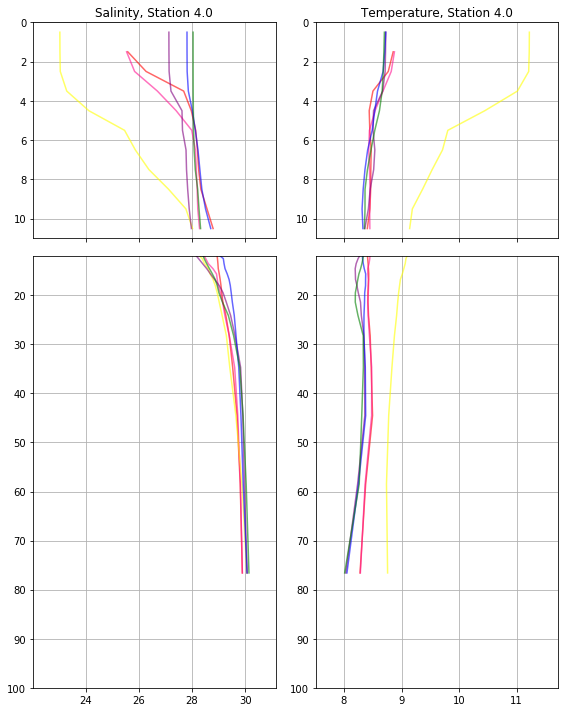

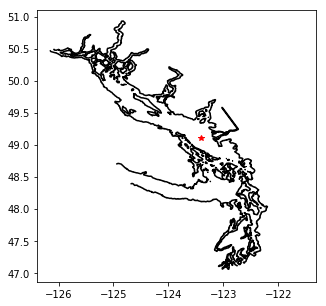

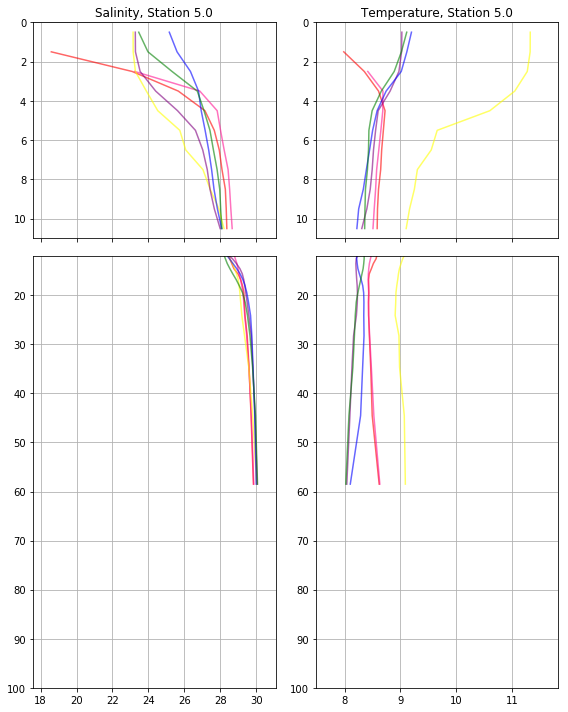

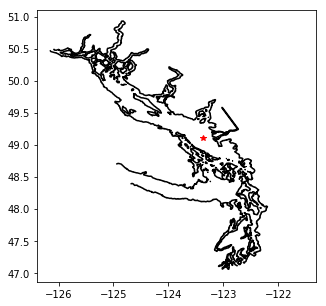

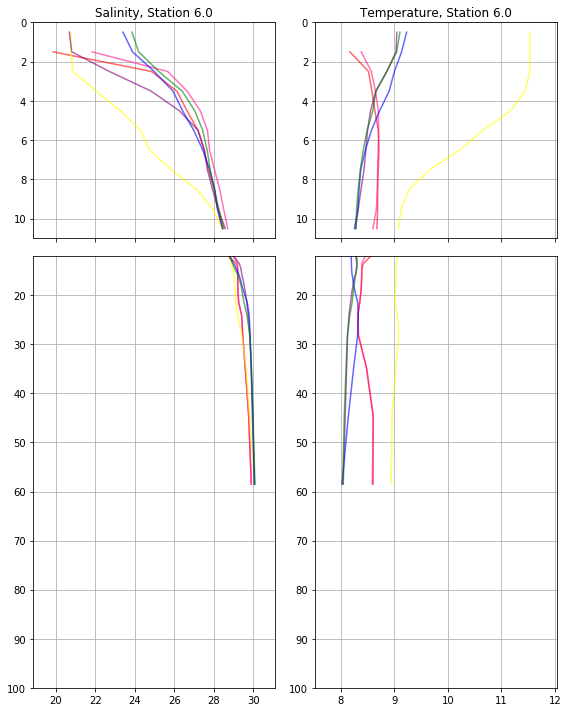

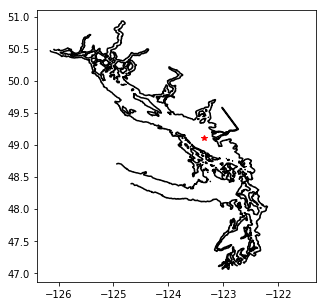

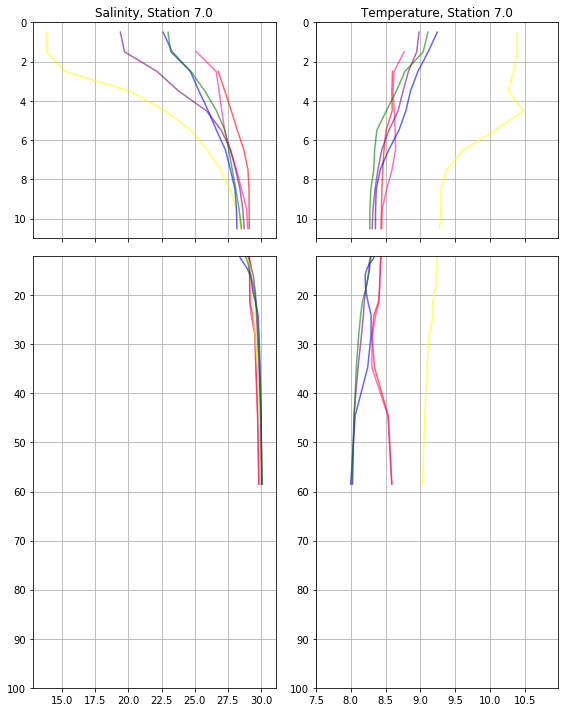

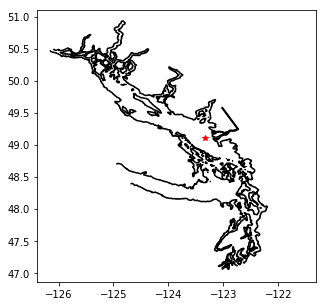

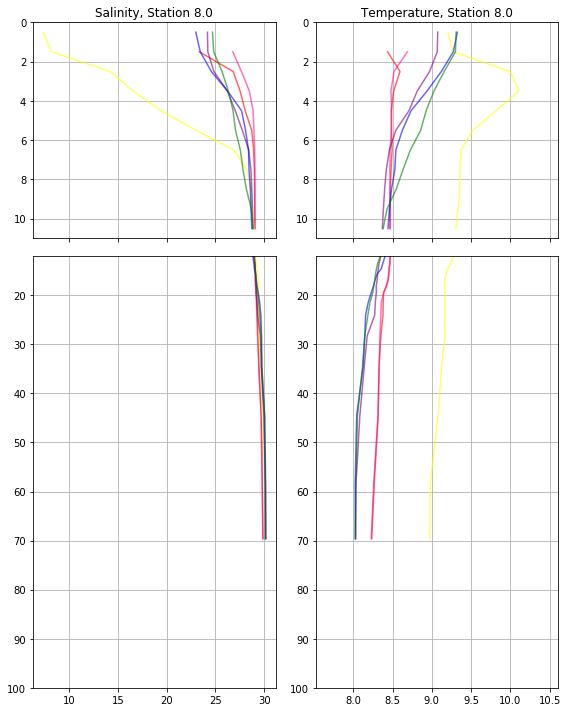

In [26]:
for n in range(8):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

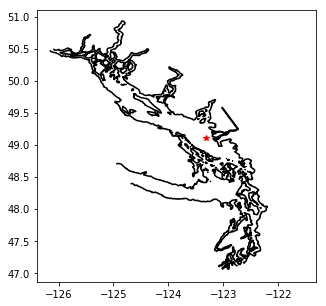

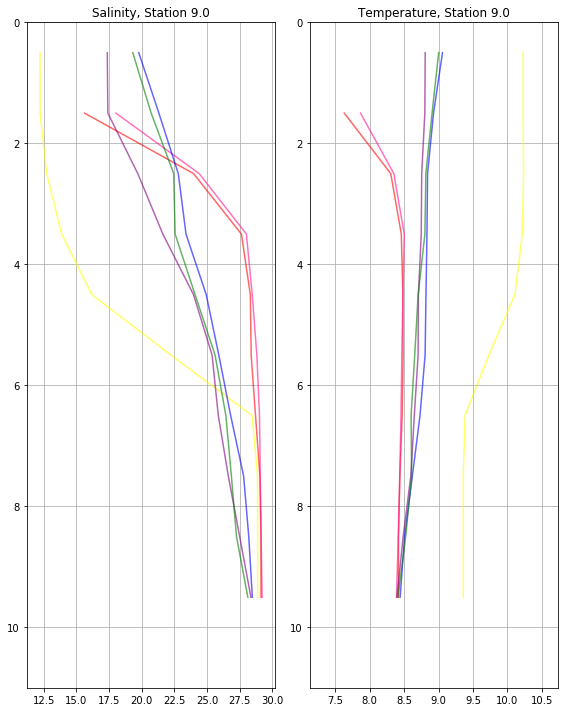

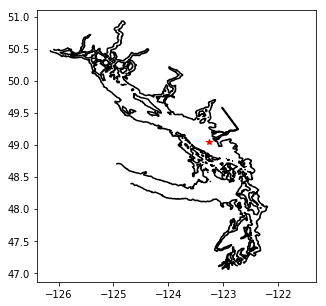

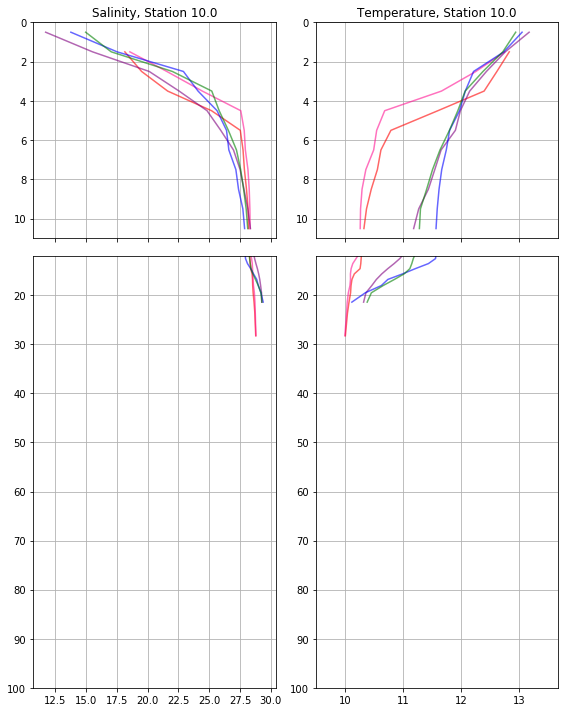

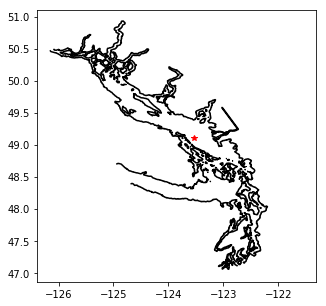

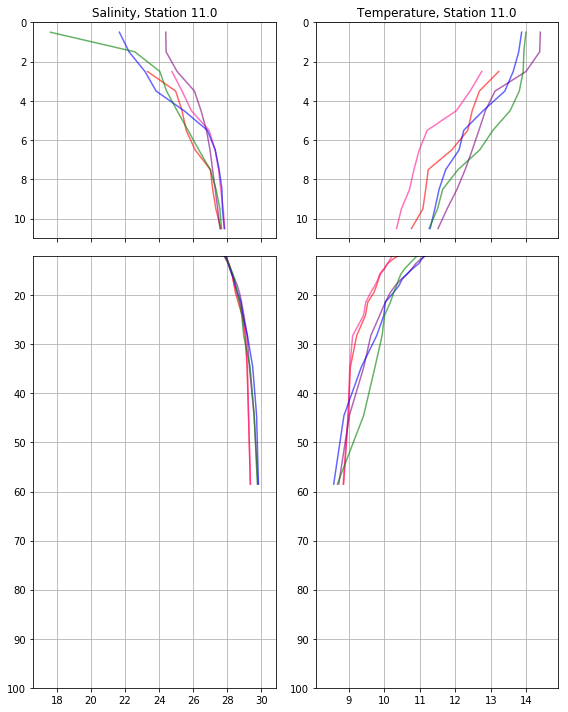

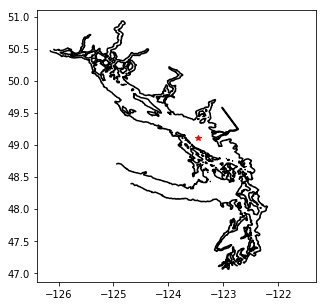

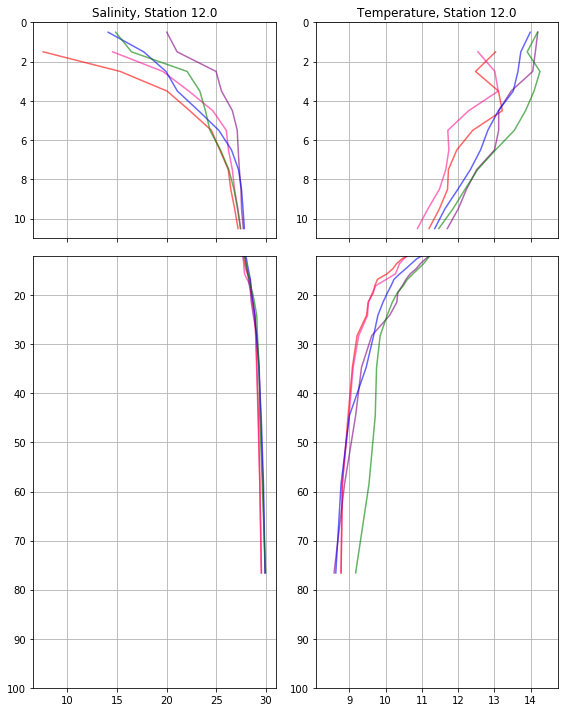

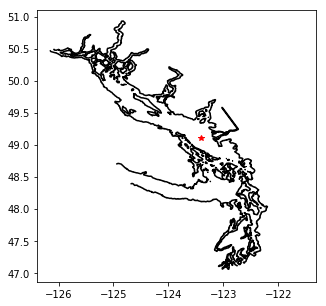

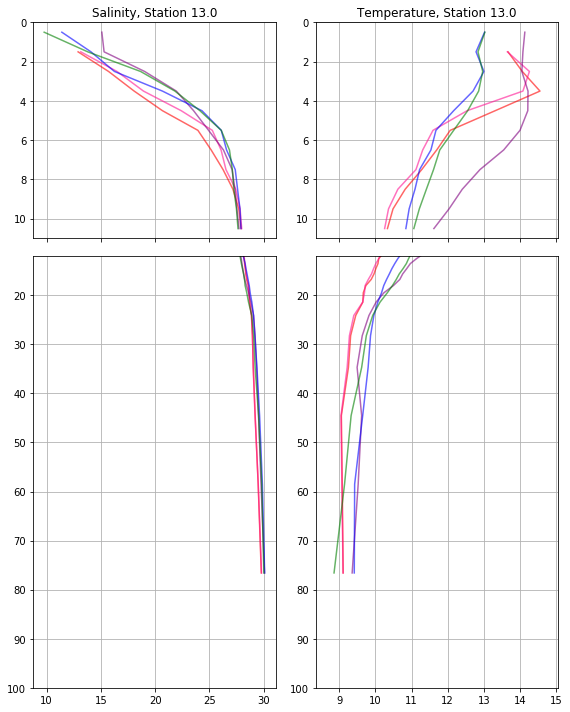

In [27]:
for n in range(8,13):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

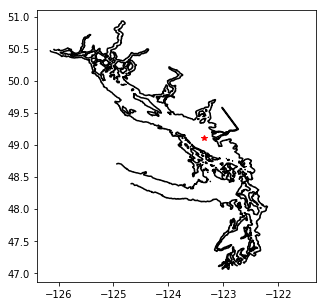

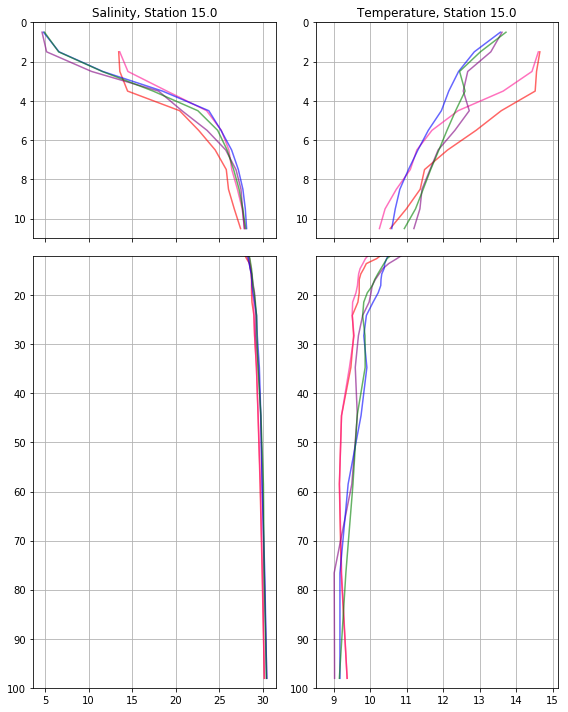

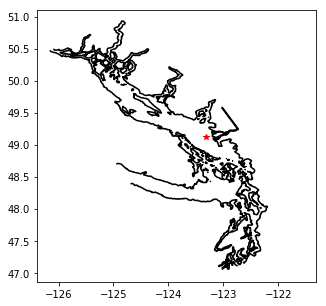

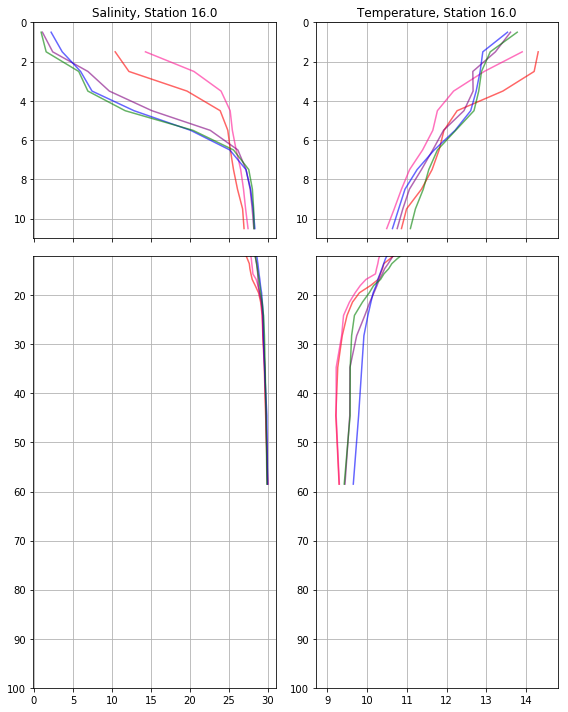

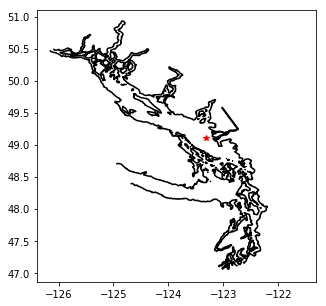

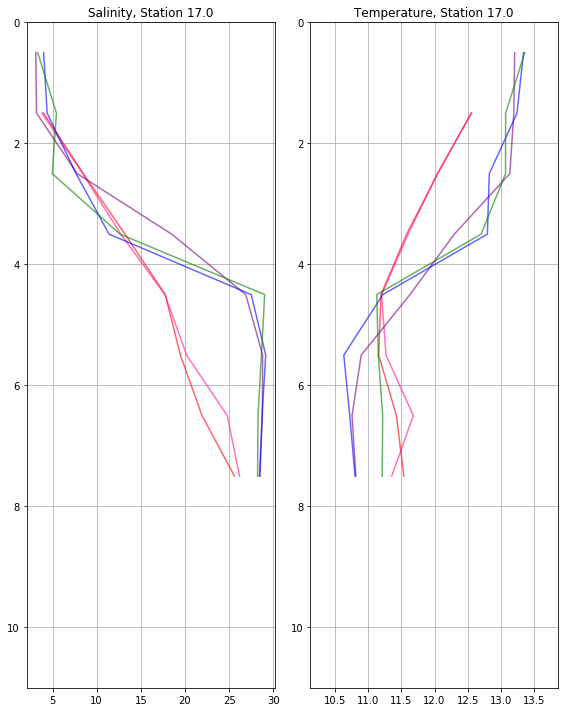

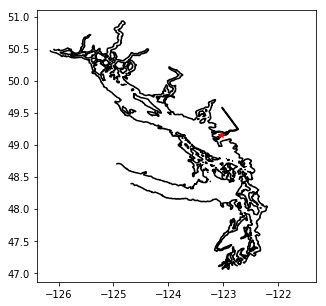

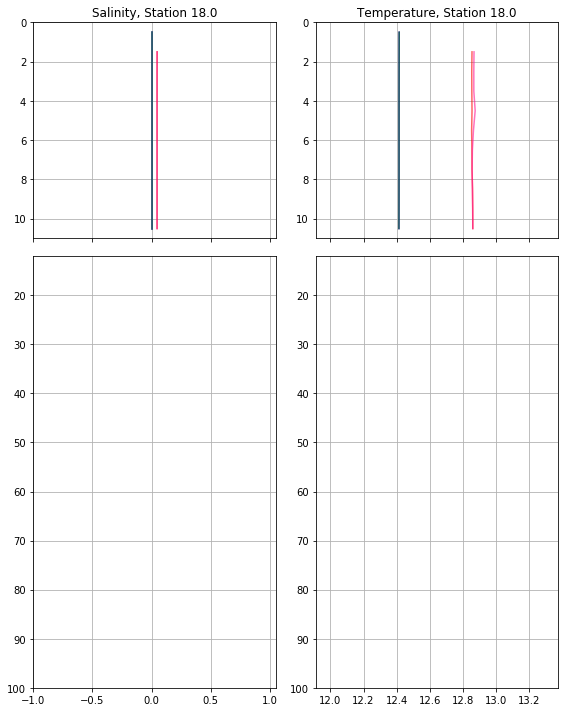

In [28]:
for n in range(15,19):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

In [29]:
obs_sal = np.array([])
model_base_sal = np.array([])
model_a_sal = np.array([])
model_b_sal = np.array([])
obs_temp = np.array([])
model_base_temp = np.array([])
model_a_temp = np.array([])
model_b_temp = np.array([])
for n in range(19):
    if (n != 14):
        if n != 13:
            print(n)
            station = stationdata.iloc[[n]]
            cast = casts[station['Station'].values[0]]
            Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                            station['LatDecDeg'].values[0],
                                                            X, Y, land_mask = bathy.mask)
            shape_depth = cast.uCast['depth_m'].values.shape[0]
            if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
                if station['Date'].values == 20170410:
                    base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
                    testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
                    testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
                else: 
                    base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
                    testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
                    testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')

                deptht = base.variables['deptht'][:shape_depth]
                cast_sal_down = cast.dCast['gsw_srA0'].values
                cast_sal_up = cast.uCast['gsw_srA0'].values
                cast_temp_down = cast.dCast['gsw_ctA0'].values
                cast_temp_up = cast.uCast['gsw_ctA0'].values
                if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
                    delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
                    before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
                else:
                    delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
                    before = int(station['Time_UTC_hhmmss'].values[0][:2])
                pt_mask = tmask[0,:shape_depth,Yind,Xind]
                m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
                m_cast_sal_up = np.ma.masked_array(cast_sal_up, mask = 1-pt_mask)
                m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
                m_cast_temp_up = np.ma.masked_array(cast_sal_up, mask = 1-pt_mask)
                masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
                base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                              mask = 1-pt_mask)
                a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                           +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                           mask = 1-pt_mask)
                b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                           +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                           mask = 1-pt_mask)
                base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                               mask = 1-pt_mask)
                a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                            +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                            mask = 1-pt_mask)
                b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                            +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                            mask = 1-pt_mask)
                m_cast_temp_up2 = np.ma.masked_invalid(m_cast_temp_up)
                m_cast_temp_down2 = np.ma.masked_invalid(m_cast_temp_down)
                m_cast_sal_up2 = np.ma.masked_invalid(m_cast_sal_up)
                m_cast_sal_down2 = np.ma.masked_invalid(m_cast_sal_down)
                obs_sal = np.append(obs_sal, np.append(m_cast_sal_up2, m_cast_sal_down2))
                model_base_sal = np.append(model_base_sal, np.append(base_sal, base_sal))
                model_a_sal = np.append(model_a_sal, np.append(a_sal, a_sal))
                model_b_sal = np.append(model_b_sal, np.append(b_sal, b_sal))
                obs_temp = np.append(obs_temp, np.append(m_cast_temp_up2, m_cast_temp_down2))
                model_base_temp = np.append(model_base_temp, np.append(base_temp, base_temp))
                model_a_temp = np.append(model_a_temp, np.append(a_temp, a_temp))
                model_b_temp = np.append(model_b_temp, np.append(b_temp, b_temp))

0
1
2
3
4
5
6
7
8
9
10
11
12
15
16
17
18


In [30]:
station = stationdata.iloc[[13]]
cast = casts[station['Station'].values[0]]
Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                station['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
shape_depth = cast.dCast['depth_m'].values.shape[0]
if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsbase_2/test9/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa_2/testi/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb_2/testi/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsbase_2/test9/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa_2/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb_2/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')

    deptht = base.variables['deptht'][:shape_depth]
    cast_sal_down = cast.dCast['gsw_srA0'].values
    cast_temp_down = cast.dCast['gsw_ctA0'].values
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
    m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)

obs_sal = np.append(obs_sal,  m_cast_sal_down)
model_base_sal = np.append(model_base_sal, base_sal)
model_a_sal = np.append(model_a_sal, a_sal)
model_b_sal = np.append(model_b_sal,  b_sal)
obs_temp = np.append(obs_temp, m_cast_temp_down)
model_base_temp = np.append(model_base_temp, base_temp)
model_a_temp = np.append(model_a_temp,  a_temp)
model_b_temp = np.append(model_b_temp,  b_temp)

station = stationdata.iloc[[14]]
cast = casts[station['Station'].values[0]]
Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                station['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
shape_depth = cast.uCast['depth_m'].values.shape[0]
if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
    
    base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsbase_2/test9/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa_2/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb_2/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')

    deptht = base.variables['deptht'][:shape_depth]
    cast_sal_down = cast.uCast['gsw_srA0'].values
    cast_temp_down = cast.uCast['gsw_ctA0'].values
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
    m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)

obs_sal = np.append(obs_sal,  m_cast_sal_down)
model_base_sal = np.append(model_base_sal, base_sal)
model_a_sal = np.append(model_a_sal, a_sal)
model_b_sal = np.append(model_b_sal,  b_sal)
obs_temp = np.append(obs_temp, m_cast_temp_down)
model_base_temp = np.append(model_base_temp, base_temp)
model_a_temp = np.append(model_a_temp,  a_temp)
model_b_temp = np.append(model_b_temp,  b_temp)

In [31]:
m_obs_sal = np.ma.masked_invalid(obs_sal)
m_obs_temp = np.ma.masked_invalid(obs_temp)

In [32]:
m_model_base_sal = np.ma.masked_array(model_base_sal, mask = m_obs_sal.mask)
m_model_a_sal = np.ma.masked_array(model_a_sal, mask = m_obs_sal.mask)
m_model_b_sal = np.ma.masked_array(model_b_sal, mask = m_obs_sal.mask)
m_model_base_temp = np.ma.masked_array(model_base_temp, mask = m_obs_temp.mask)
m_model_a_temp = np.ma.masked_array(model_a_temp, mask = m_obs_temp.mask)
m_model_b_temp = np.ma.masked_array(model_b_temp, mask = m_obs_temp.mask)

# Sallinity, base case

In [33]:
print('bias =  ' + str(-np.mean(m_obs_sal) + np.mean(m_model_base_sal)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_base_sal - m_obs_sal)**2) / len(m_model_base_sal))))
xbar = np.mean(m_obs_sal)
print('Willmott = ' + str(1-(np.sum((m_model_base_sal - m_obs_sal)**2)  / 
                             np.sum((np.abs(m_model_base_sal - xbar) + np.abs(m_obs_sal - xbar))**2))))

bias =  -0.183474876706
RMSE = 2.73482385321
Willmott = 0.967175741548


# Salinity, test a

In [34]:
print('bias =  ' + str(-np.mean(m_obs_sal) + np.mean(m_model_a_sal)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_a_sal - m_obs_sal)**2) / len(m_model_a_sal))))
xbar = np.mean(m_obs_sal)
print('Willmott = ' + str(1-(np.sum((m_model_a_sal - m_obs_sal)**2)  / 
                             np.sum((np.abs(m_model_a_sal - xbar) + np.abs(m_obs_sal - xbar))**2))))

bias =  0.0181612671221
RMSE = 2.8095631139
Willmott = 0.96509559188


# Salinity, test b

In [35]:
print('bias =  ' + str(-np.mean(m_obs_sal) + np.mean(m_model_b_sal)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_b_sal - m_obs_sal)**2) / len(m_model_b_sal))))
xbar = np.mean(m_obs_sal)
print('Willmott = ' + str(1-(np.sum((m_model_b_sal - m_obs_sal)**2)  / 
                             np.sum((np.abs(m_model_b_sal - xbar) + np.abs(m_obs_sal - xbar))**2))))

bias =  -0.0605211311015
RMSE = 2.7210815183
Willmott = 0.967089832327


# Temperature, base case

In [36]:
print('bias =  ' + str(-np.mean(m_obs_temp) + np.mean(m_model_base_temp)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_base_temp - m_obs_temp)**2) / len(m_model_base_temp))))
xbar = np.mean(m_obs_temp)
print('Willmott = ' + str(1-(np.sum((m_model_base_temp - m_obs_temp)**2)  / 
                             np.sum((np.abs(m_model_base_temp - xbar) + np.abs(m_obs_temp - xbar))**2))))

bias =  -7.31996744626
RMSE = 11.9337866468
Willmott = 0.477091801158


# Temperature, test a

In [37]:
print('bias =  ' + str(-np.mean(m_obs_temp) + np.mean(m_model_a_temp)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_a_temp - m_obs_temp)**2) / len(m_model_a_temp))))
xbar = np.mean(m_obs_temp)
print('Willmott = ' + str(1-(np.sum((m_model_a_temp - m_obs_temp)**2)  / 
                             np.sum((np.abs(m_model_a_temp - xbar) + np.abs(m_obs_temp - xbar))**2))))

bias =  -7.42848458658
RMSE = 11.9823670972
Willmott = 0.478275988978


# Temperature, test b

In [39]:
print('bias =  ' + str(-np.mean(m_obs_temp) + np.mean(m_model_b_temp)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_b_temp - m_obs_temp)**2) / len(m_model_b_temp))))
xbar = np.mean(m_obs_temp)
print('Willmott = ' + str(1-(np.sum((m_model_b_temp - m_obs_temp)**2)  / 
                             np.sum((np.abs(m_model_b_temp - xbar) + np.abs(m_obs_temp - xbar))**2))))

bias =  -7.41734979776
RMSE = 11.9823712782
Willmott = 0.477900927356


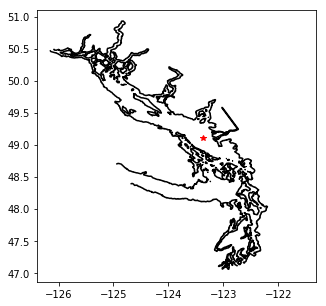

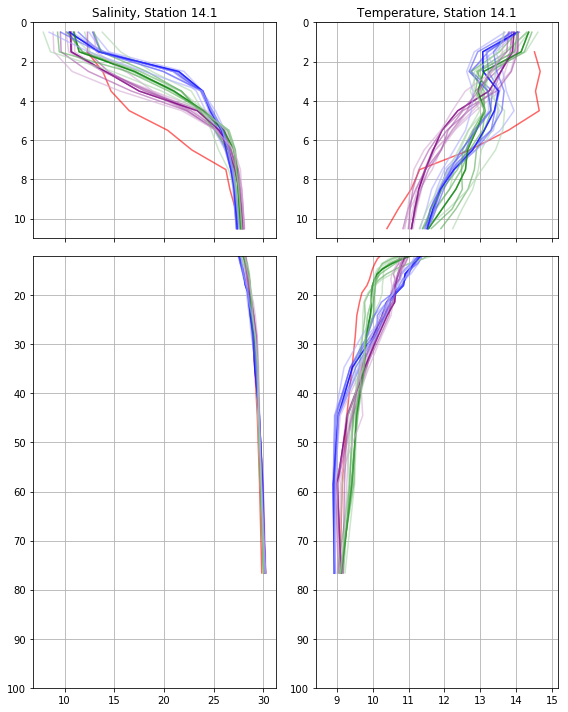

In [40]:
where(stationdata.iloc[[13]])
cast = casts[14.1]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[13]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[13]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.dCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.dCast['depth_m'].values
cast_sal_down = cast.dCast['gsw_srA0'].values
cast_temp_down = cast.dCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2])
n = 1
for j in range(Yind - 2, Yind + 3):
    pt_mask = tmask[0,:shape_depth,j,Xind]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[n], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[n], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[n], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[n], alpha = 0.6)
    n = n + 1
m = 1
for i in range(Xind - 2, Xind + 3):
    pt_mask = tmask[0,:shape_depth,Yind,i]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[m], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[m], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[m], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[m], alpha = 0.6)
    m = m + 1
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.1')
ax[0,1].set_title('Temperature, Station 14.1')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
fig.tight_layout()

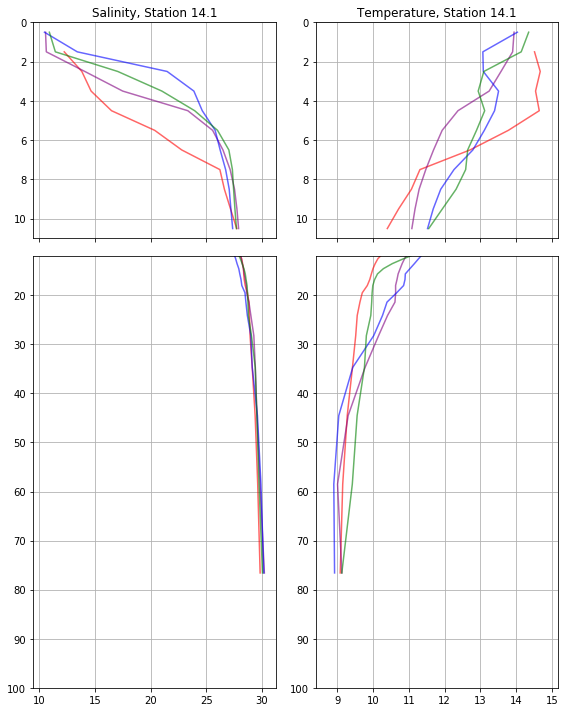

In [41]:
cast = casts[14.1]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[13]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[13]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.dCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.dCast['depth_m'].values
cast_sal_down = cast.dCast['gsw_srA0'].values
cast_temp_down = cast.dCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2])

pt_mask = tmask[0,:shape_depth,Yind,Xind]
masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                              mask = 1-pt_mask)
a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,0].plot(a_sal[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,0].plot(b_sal[:11], deptht[:11], color= 'green', alpha = 0.6)
ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,0].plot(a_sal[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,0].plot(b_sal[11:], deptht[11:], color= 'green', alpha = 0.6)
ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,1].plot(a_temp[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,1].plot(b_temp[:11], deptht[:11], color = 'green', alpha = 0.6)
ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,1].plot(a_temp[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,1].plot(b_temp[11:], deptht[11:], color = 'green', alpha = 0.6)
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.1')
ax[0,1].set_title('Temperature, Station 14.1')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
fig.tight_layout()

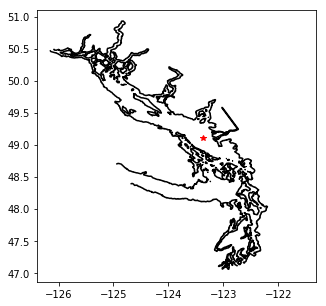

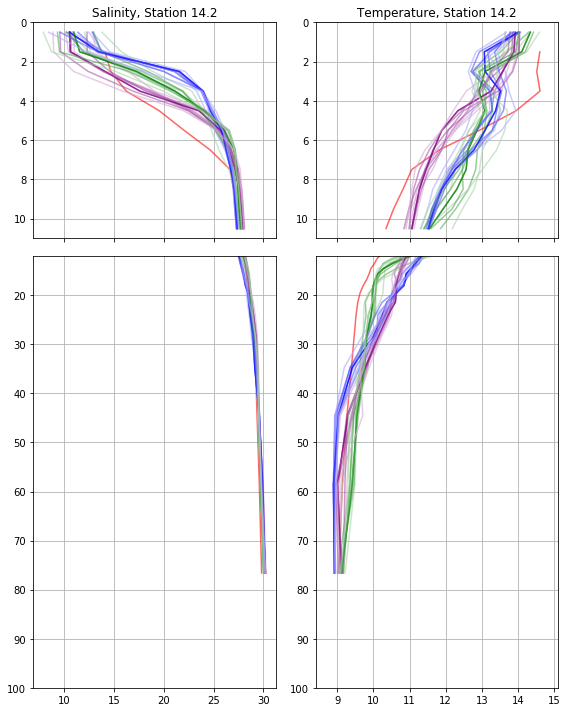

In [42]:
where(stationdata.iloc[[14]])
cast = casts[14.2]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[14]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[14]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.uCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.uCast['depth_m'].values
cast_sal_down = cast.uCast['gsw_srA0'].values
cast_temp_down = cast.uCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2])
n = 1
for j in range(Yind - 2, Yind + 3):
    pt_mask = tmask[0,:shape_depth,j,Xind]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[n], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[n], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[n], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[n], alpha = 0.6)
    n = n + 1
m = 1
for i in range(Xind - 2, Xind + 3):
    pt_mask = tmask[0,:shape_depth,Yind,i]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[m], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[m], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[m], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[m], alpha = 0.6)
    m = m + 1
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.2')
ax[0,1].set_title('Temperature, Station 14.2')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
fig.tight_layout()

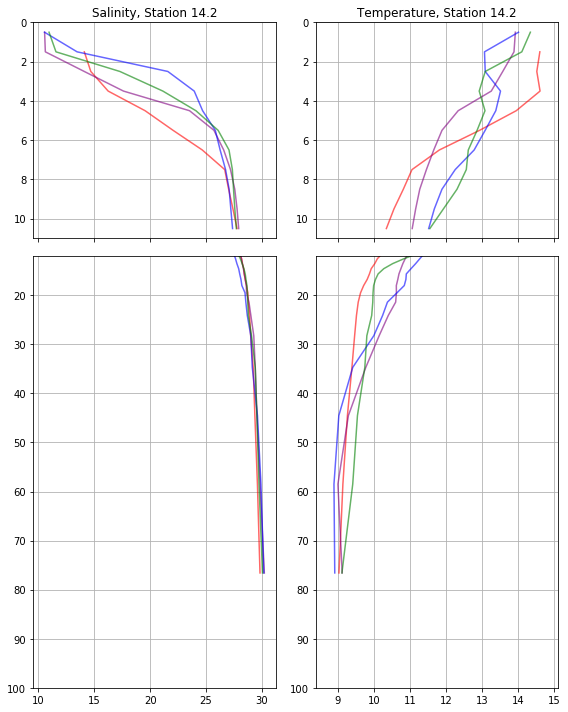

In [43]:
cast = casts[14.2]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[14]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[14]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.uCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.uCast['depth_m'].values
cast_sal_down = cast.uCast['gsw_srA0'].values
cast_temp_down = cast.uCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2])
pt_mask = tmask[0,:shape_depth,Yind,Xind]
masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                              mask = 1-pt_mask)
a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,0].plot(a_sal[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,0].plot(b_sal[:11], deptht[:11], color= 'green', alpha = 0.6)
ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,0].plot(a_sal[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,0].plot(b_sal[11:], deptht[11:], color= 'green', alpha = 0.6)
ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,1].plot(a_temp[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,1].plot(b_temp[:11], deptht[:11], color = 'green', alpha = 0.6)
ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,1].plot(a_temp[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,1].plot(b_temp[11:], deptht[11:], color = 'green', alpha = 0.6)
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.2')
ax[0,1].set_title('Temperature, Station 14.2')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
fig.tight_layout()

In [44]:
ups_temperature = np.ma.masked_array(np.zeros((19, 27)), mask = True)
downs_temperature = np.ma.masked_array(np.zeros((19, 27)), mask = True)
ups_salinity = np.ma.masked_array(np.zeros((19, 27)), mask = True)
downs_salinity = np.ma.masked_array(np.zeros((19, 27)), mask = True)
for n in range(19):
    length_up = casts[stationdata['Station'].values[n]].uCast['depth_m'].values.shape[0]
    length_down = casts[stationdata['Station'].values[n]].dCast['depth_m'].values.shape[0]
    ups_sals = casts[stationdata['Station'].values[n]].uCast['gsw_srA0'].values
    down_sals = casts[stationdata['Station'].values[n]].dCast['gsw_srA0'].values
    ups_temps = casts[stationdata['Station'].values[n]].uCast['gsw_ctA0'].values
    down_temps = casts[stationdata['Station'].values[n]].dCast['gsw_ctA0'].values
    for m in range(length_up):
        ups_temperature[n,m].mask = False
        ups_salinity[n,m].mask = False
        ups_temperature[n,m] = ups_temps[m]
        ups_salinity[n,m] = ups_sals[m]
    for f in range(length_down):
        downs_temperature[n,f].mask = False
        downs_salinity[n,f].mask = False
        downs_temperature[n,f] = down_temps[f]
        downs_salinity[n,f] = down_sals[f] 

In [45]:
model_f_temp = np.ma.masked_array(np.zeros((9,27)), mask = True)
model_f_sal = np.ma.masked_array(np.zeros((9,27)), mask = True)
for n in range(9):
    print(n)
    station = stationdata.iloc[[n]]
    cast = casts[stationdata['Station'].values[n]]
    Yind, Xind = geo_tools.find_closest_model_point(stationdata['LonDecDeg'].values[n], 
                                                    stationdata['LatDecDeg'].values[n],
                                                    X, Y, land_mask = bathy.mask)
    shape_depth = cast.uCast['depth_m'].values.shape[0]
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    f_sal = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, Xind]
                               +(1-delta)*f_temps[before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    for m in range(shape_depth):
        model_f_sal[n,m].mask = False
        model_f_sal[n,m] = f_sal[m]
    f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, Xind]
                                +(1-delta)*f_temps[before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    for m in range(shape_depth):
        model_f_temp[n,m].mask = False
        model_f_temp[n,m] = f_temp[m]

0
1
2
3
4
5
6
7
8


In [46]:
model_base_temp = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_base_sal = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_a_temp = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_a_sal = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_b_temp = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_b_sal = np.ma.masked_array(np.zeros((19,27)), mask = True)
for n in range(19):
    print(n)
    station = stationdata.iloc[[n]]
    cast = casts[stationdata['Station'].values[n]]
    Yind, Xind = geo_tools.find_closest_model_point(stationdata['LonDecDeg'].values[n], 
                                                    stationdata['LatDecDeg'].values[n],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsbase_2/test4/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa_2/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb_2/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsbase_2/test9/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa_2/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb_2/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    if n ==13:
        shape_depth = cast.dCast['depth_m'].values.shape[0]
    else:
        shape_depth = cast.uCast['depth_m'].values.shape[0]
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    for m in range(shape_depth):
        model_base_sal[n,m].mask = False
        model_base_sal[n,m] = base_sal[m]
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    for m in range(shape_depth):
        model_a_sal[n,m].mask = False
        model_a_sal[n,m] = a_sal[m]
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    for m in range(shape_depth):
        model_b_sal[n,m].mask = False
        model_b_sal[n,m] = b_sal[m]
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    for m in range(shape_depth):
        model_base_temp[n,m].mask = False
        model_base_temp[n,m] = base_temp[m]
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    for m in range(shape_depth):
        model_a_temp[n,m].mask = False
        model_a_temp[n,m] = a_temp[m]
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    for m in range(shape_depth):
        model_b_temp[n,m].mask = False
        model_b_temp[n,m] = b_temp[m]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [47]:
depths = casts[15].uCast['depth_m'].values

In [48]:
ctd_sals = np.ma.masked_array(np.zeros((38, 27)), mask = True)
ctd_temps = np.ma.masked_array(np.zeros((38,27)), mask = True)
for n in range(27):
    ctd_sals[:,n].mask = np.append(ups_salinity[:,n].mask, downs_salinity[:,n].mask)
    ctd_sals[:,n] = np.append(ups_salinity[:,n], downs_salinity[:,n])
    ctd_temps[:,n].mask = np.append(ups_temperature[:,n].mask, downs_temperature[:,n].mask)
    ctd_temps[:,n] = np.append(ups_temperature[:,n], downs_temperature[:,n])
ctd_sals = np.ma.masked_equal(ctd_sals, 0)
ctd_temps = np.ma.masked_equal(ctd_temps, 0)
ctd_sals = np.ma.masked_invalid(ctd_sals)
ctd_temps = np.ma.masked_invalid(ctd_temps)

In [49]:
apr30_ctd_sals = np.ma.masked_array(np.zeros((18, 27)), mask = True)
apr30_ctd_temps = np.ma.masked_array(np.zeros((18,27)), mask = True)
for n in range(27):
    apr30_ctd_sals[:,n].mask = np.append(ups_salinity[:9,n].mask, downs_salinity[:9,n].mask)
    apr30_ctd_sals[:,n] = np.append(ups_salinity[:9,n], downs_salinity[:9,n])
    apr30_ctd_temps[:,n].mask = np.append(ups_temperature[:9,n].mask, downs_temperature[:9,n].mask)
    apr30_ctd_temps[:,n] = np.append(ups_temperature[:9,n], downs_temperature[:9,n])
apr30_ctd_sals = np.ma.masked_equal(apr30_ctd_sals, 0)
apr30_ctd_temps = np.ma.masked_equal(apr30_ctd_temps, 0)
apr30_ctd_sals = np.ma.masked_invalid(apr30_ctd_sals)
apr30_ctd_temps = np.ma.masked_invalid(apr30_ctd_temps)

In [50]:
model_a_sal_full = np.zeros((38, 27))
model_a_temp_full = np.zeros((38,27))
model_b_sal_full = np.zeros((38, 27))
model_b_temp_full = np.zeros((38,27))
model_base_sal_full = np.zeros((38, 27))
model_base_temp_full = np.zeros((38,27))
for n in range(27):
    model_a_sal_full[:,n] = np.append(model_a_sal[:,n], model_a_sal[:,n])
    model_b_sal_full[:,n] = np.append(model_b_sal[:,n], model_b_sal[:,n])
    model_base_sal_full[:,n] = np.append(model_base_sal[:,n], model_base_sal[:,n])
    model_a_temp_full[:,n] = np.append(model_a_temp[:,n], model_a_temp[:,n])
    model_b_temp_full[:,n] = np.append(model_b_temp[:,n], model_b_temp[:,n])
    model_base_temp_full[:,n] = np.append(model_base_temp[:,n], model_base_temp[:,n])

In [51]:
model_f_sal_full = np.zeros((18, 27))
model_f_temp_full = np.zeros((18,27))
for n in range(27):
    model_f_sal_full[:,n] = np.append(model_f_sal[:,n], model_f_sal[:,n])
    model_f_temp_full[:,n] = np.append(model_f_temp[:,n], model_f_temp[:,n])

In [52]:
model_a_sal_full_masked = np.ma.masked_array(model_a_sal_full, ctd_sals.mask)
model_b_sal_full_masked = np.ma.masked_array(model_b_sal_full, ctd_sals.mask)
model_base_sal_full_masked = np.ma.masked_array(model_base_sal_full, ctd_sals.mask)
model_a_temp_full_masked = np.ma.masked_array(model_a_temp_full, ctd_temps.mask)
model_b_temp_full_masked = np.ma.masked_array(model_b_temp_full, ctd_temps.mask)
model_base_temp_full_masked = np.ma.masked_array(model_base_temp_full, ctd_temps.mask)

In [53]:
model_f_sal_full_masked = np.ma.masked_array(model_f_sal_full, apr30_ctd_sals.mask)
model_f_temp_full_masked = np.ma.masked_array(model_f_temp_full, apr30_ctd_temps.mask)

In [54]:
np.array([1-(np.sum((model_base_sal_full_masked[:,n] - ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_base_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])) + 
                                     np.abs(model_b_temp_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])))**2)) for n in range(27)])

/home/vdo/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


array([        nan,  0.86369767,  0.95005476,  0.95332447,  0.9714792 ,
        0.99389993,  0.9978135 ,  0.99903972,  0.9991329 ,  0.99936547,
        0.99946278,  0.99969874,  0.99971078,  0.99975726,  0.99972921,
        0.99974156,  0.99978619,  0.9998112 ,  0.99980096,  0.99981151,
        0.90135473,  0.9017773 ,  0.99986976,  0.99986993,  0.99986958,
        0.99985348,  0.99983312])

In [73]:
for n in range(19):
    w, q = geo_tools.find_closest_model_point(stationdata.iloc[[n]]['LonDecDeg'].values[0],
                                              stationdata.iloc[[n]]['LatDecDeg'].values[0],
                                              X, Y, land_mask = bathy.mask)
    ctd_sals.mask[n, 20:22] = 1 - tmask[0,20:22,w, q]
    ctd_sals.mask[n+19, 20:22] = 1 - tmask[0,20:22,w, q]

In [74]:
base_bias_sal = np.array([np.ma.mean(model_base_sal_full_masked[:,n]) 
                      - np.ma.mean(ctd_sals[:,n]) for n in range(27)])
base_RMSE_sal = np.array([np.sqrt(np.sum((model_base_sal_full_masked[:,n] - ctd_sals[:,n])**2)
                     / model_base_sal_full_masked[:,n].count()) for n in range(27)])
base_willmott_sal = np.array([1-(np.sum((model_base_sal_full_masked[:,n] - ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_base_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])) + 
                                     np.abs(model_base_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])))**2)) for n in range(27)])
base_bias_temp = np.array([np.ma.mean(model_base_temp_full_masked[:,n]) 
                      - np.ma.mean(ctd_temps[:,n]) for n in range(27)])
base_RMSE_temp = np.array([np.sqrt(np.sum((model_base_temp_full_masked[:,n] - ctd_temps[:,n])**2)
                     / model_base_temp_full_masked[:,n].count()) for n in range(27)])
base_willmott_temp = np.array([1-(np.sum((model_base_temp_full_masked[:,n] - ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_base_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])) + 
                                     np.abs(model_base_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])))**2)) for n in range(27)])
a_bias_sal = np.array([np.ma.mean(model_a_sal_full_masked[:,n]) 
                      - np.ma.mean(ctd_sals[:,n]) for n in range(27)])
a_RMSE_sal = np.array([np.sqrt(np.sum((model_a_sal_full_masked[:,n] - ctd_sals[:,n])**2)
                     / model_a_sal_full_masked[:,n].count()) for n in range(27)])
a_willmott_sal = np.array([1-(np.sum((model_a_sal_full_masked[:,n] - ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_a_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])) + 
                                     np.abs(model_a_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])))**2)) for n in range(27)])
a_bias_temp = np.array([np.ma.mean(model_a_temp_full_masked[:,n]) 
                      - np.ma.mean(ctd_temps[:,n]) for n in range(27)])
a_RMSE_temp = np.array([np.sqrt(np.sum((model_a_temp_full_masked[:,n] - ctd_temps[:,n])**2)
                     / model_a_temp_full_masked[:,n].count()) for n in range(27)])
a_willmott_temp = np.array([1-(np.sum((model_a_temp_full_masked[:,n] - ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_a_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])) + 
                                     np.abs(model_a_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])))**2)) for n in range(27)])
b_bias_sal = np.array([np.ma.mean(model_b_sal_full_masked[:,n]) 
                      - np.ma.mean(ctd_sals[:,n]) for n in range(27)])
b_RMSE_sal = np.array([np.sqrt(np.sum((model_b_sal_full_masked[:,n] - ctd_sals[:,n])**2)
                     / model_b_sal_full_masked[:,n].count()) for n in range(27)])
b_willmott_sal = np.array([1-(np.sum((model_b_sal_full_masked[:,n] - ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_b_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])) + 
                                     np.abs(model_b_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])))**2)) for n in range(27)])
b_bias_temp = np.array([np.ma.mean(model_b_temp_full_masked[:,n]) 
                      - np.ma.mean(ctd_temps[:,n]) for n in range(27)])
b_RMSE_temp = np.array([np.sqrt(np.sum((model_b_temp_full_masked[:,n] - ctd_temps[:,n])**2)
                     / model_b_temp_full_masked[:,n].count()) for n in range(27)])
b_willmott_temp = np.array([1-(np.sum((model_b_temp_full_masked[:,n] - ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_b_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])) + 
                                     np.abs(model_b_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])))**2)) for n in range(27)])

/home/vdo/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [56]:
f_bias_sal = np.array([np.ma.mean(model_f_sal_full_masked[:,n]) 
                      - np.ma.mean(apr30_ctd_sals[:,n]) for n in range(27)])
f_RMSE_sal = np.array([np.sqrt(np.sum((model_f_sal_full_masked[:,n] - apr30_ctd_sals[:,n])**2)
                     / model_f_sal_full_masked[:,n].count()) for n in range(27)])
f_willmott_sal = np.array([1-(np.sum((model_f_sal_full_masked[:,n] - apr30_ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_f_sal_full_masked[:,n] - 
                                            np.mean(apr30_ctd_sals[:,n])) + 
                                     np.abs(model_f_sal_full_masked[:,n] - 
                                            np.mean(apr30_ctd_sals[:,n])))**2)) 
                           for n in range(27)])
f_bias_temp = np.array([np.ma.mean(model_f_temp_full_masked[:,n]) 
                      - np.ma.mean(apr30_ctd_temps[:,n]) for n in range(27)])
f_RMSE_temp = np.array([np.sqrt(np.sum((model_f_temp_full_masked[:,n] - apr30_ctd_temps[:,n])**2)
                     / model_f_temp_full_masked[:,n].count()) for n in range(27)])
f_willmott_temp = np.array([1-(np.sum((model_f_temp_full_masked[:,n] - apr30_ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_f_temp_full_masked[:,n] - 
                                            np.mean(apr30_ctd_temps[:,n])) + 
                                     np.abs(model_f_temp_full_masked[:,n] - 
                                            np.mean(apr30_ctd_temps[:,n])))**2)) for n in range(27)])

/home/vdo/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [57]:
number_of_samples = np.array([ctd_sals[:,n].count() for n in range(27)])

In [58]:
number_of_samples_apr30 = np.array([apr30_ctd_sals[:,n].count() for n in range(27)])

In [75]:
a = pd.DataFrame()
a = a.assign(depth_m = depths)
b = a.assign(base_case_bias_sal = base_bias_sal)
b = b.assign(base_case_rmse_sal = base_RMSE_sal)
b = b.assign(base_case_willmott_sal = base_willmott_sal)
b = b.assign(testa_bias_sal = a_bias_sal)
b = b.assign(testa_rmse_sal = a_RMSE_sal)
b = b.assign(testa_willmott_sal = a_willmott_sal)
b = b.assign(testb_bias_sal = b_bias_sal)
b = b.assign(testb_rmse_sal = b_RMSE_sal)
b = b.assign(testb_willmott_sal = b_willmott_sal)
b = b.assign(base_case_bias_temp = base_bias_temp)
b = b.assign(base_case_rmse_temp = base_RMSE_temp)
b = b.assign(base_case_willmott_temp = base_willmott_temp)
b = b.assign(testa_bias_temp = a_bias_temp)
b = b.assign(testa_RMSE_temp = a_RMSE_temp)
b = b.assign(testa_willmott_temp = a_willmott_temp)
b = b.assign(testb_bias_temp = b_bias_temp)
b = b.assign(testb_rmse_temp = b_RMSE_temp)
b = b.assign(testb_willmott_temp = b_willmott_temp)
b = b.assign(number_of_points = number_of_samples)
b = b.assign(testf_bias_sal = f_bias_sal)
b = b.assign(testf_rmse_sal = f_RMSE_sal)
b = b.assign(testf_willmott_sal = f_willmott_sal)
b = b.assign(testf_bias_temp = f_bias_temp)
b = b.assign(testf_RMSE_temp = f_RMSE_temp)
b = b.assign(testf_willmott_temp = f_willmott_temp)
b = b.assign(apr30_number_of_points = number_of_samples_apr30)

In [76]:
b.keys()

Index(['depth_m', 'base_case_bias_sal', 'base_case_rmse_sal',
       'base_case_willmott_sal', 'testa_bias_sal', 'testa_rmse_sal',
       'testa_willmott_sal', 'testb_bias_sal', 'testb_rmse_sal',
       'testb_willmott_sal', 'base_case_bias_temp', 'base_case_rmse_temp',
       'base_case_willmott_temp', 'testa_bias_temp', 'testa_RMSE_temp',
       'testa_willmott_temp', 'testb_bias_temp', 'testb_rmse_temp',
       'testb_willmott_temp', 'number_of_points', 'testf_bias_sal',
       'testf_rmse_sal', 'testf_willmott_sal', 'testf_bias_temp',
       'testf_RMSE_temp', 'testf_willmott_temp', 'apr30_number_of_points'],
      dtype='object')

In [77]:
b[['depth_m', 'base_case_bias_sal', 'testa_bias_sal', 'testb_bias_sal', 'number_of_points',
  'testf_bias_sal', 'apr30_number_of_points']]

depth_m  base_case_bias_sal  testa_bias_sal  testb_bias_sal  \
0    0.500000                 NaN             NaN             NaN   
1    1.500003            0.017532        0.215213        0.054334   
2    2.500011           -0.413089       -0.478681       -0.069098   
3    3.500031           -0.700341       -0.927642       -0.492072   
4    4.500071           -0.845820       -0.862640       -0.868100   
5    5.500151           -0.354673       -0.303065       -0.335689   
6    6.500310            0.043347        0.152739       -0.113459   
7    7.500623           -0.019931        0.124776       -0.142178   
8    8.501236           -0.089231        0.066651       -0.099821   
9    9.502433           -0.145546       -0.012095       -0.131203   
10  10.504766           -0.147258       -0.031990       -0.138071   
11  11.509312           -0.036848        0.034793       -0.069337   
12  12.518167            0.011615        0.046312       -0.062977   
13  13.535412            0.058793        0.071474       -0.047406   
14  14.568982            0.113601        0.128280       -0.008410   
15  15.634288            0.144880        0.191314        0.039670   
16  16.761173            0.150247        0.220759        0.070596   
17  18.007135            0.161404        0.221558        0.098172   
18  19.481785            0.188255        0.250135        0.156326   
19  21.389978            0.191634        0.291032        0.193774   
20  24.100256            2.369517        2.476771        2.407601   
21  28.229916            2.424331        2.476270        2.422263   
22  34.685757            0.225719        0.245828        0.230102   
23  44.517723            0.224528        0.264036        0.235334   
24  58.484333            0.218143        0.237122        0.239357   
25  76.585587            0.250868        0.264815        0.252906   
26  98.062958            0.275010        0.269479        0.226460   

    number_of_points  testf_bias_sal  apr30_number_of_points  
0                  0             NaN                       0  
1                 32       -7.478673                      16  
2                 36      -10.138234                      18  
3                 34      -13.588538                      16  
4                 34      -14.374790                      16  
5                 34      -15.094666                      16  
6                 34      -15.478025                      16  
7                 34      -15.822146                      16  
8                 32      -16.076542                      16  
9                 32      -16.267273                      16  
10                30      -15.882985                      14  
11                28      -19.657189                      12  
12                26      -19.763053                      12  
13                26      -19.845832                      12  
14                26      -19.911002                      12  
15                26      -19.970701                      12  
16                26      -20.017228                      12  
17                26      -20.058131                      12  
18                26      -20.124167                      12  
19                26      -20.196138                      12  
20                26      -20.294163                      12  
21                26      -20.413071                      12  
22                24      -20.569443                      12  
23                24      -20.750094                      12  
24                24      -20.897043                      12  
25                14      -21.045401                       6  
26                 2             NaN                       0

In [78]:
b[['depth_m', 'base_case_rmse_sal', 'testa_rmse_sal', 'testb_rmse_sal', 'number_of_points',
  'testf_rmse_sal', 'apr30_number_of_points']]

depth_m  base_case_rmse_sal  testa_rmse_sal  testb_rmse_sal  \
0    0.500000                 NaN             NaN             NaN   
1    1.500003            5.083136        4.606379        4.689452   
2    2.500011            3.640935        3.257886        3.313644   
3    3.500031            3.823046        3.929627        4.290158   
4    4.500071            3.200917        3.625672        3.754066   
5    5.500151            1.530501        1.844520        1.751548   
6    6.500310            0.950309        1.102235        0.998804   
7    7.500623            0.653557        0.767728        0.671608   
8    8.501236            0.639893        0.748490        0.635220   
9    9.502433            0.555258        0.641131        0.547212   
10  10.504766            0.516288        0.574570        0.495714   
11  11.509312            0.362833        0.439526        0.352939   
12  12.518167            0.326231        0.415591        0.337914   
13  13.535412            0.301388        0.354929        0.299442   
14  14.568982            0.320235        0.322350        0.285043   
15  15.634288            0.314791        0.317363        0.273104   
16  16.761173            0.288124        0.306583        0.243728   
17  18.007135            0.272409        0.285801        0.240551   
18  19.481785            0.281621        0.297611        0.258229   
19  21.389978            0.276107        0.337046        0.269684   
20  24.100256            8.027776        8.076340        8.062129   
21  28.229916            8.092983        8.108023        8.089833   
22  34.685757            0.236075        0.262324        0.241482   
23  44.517723            0.238722        0.284438        0.249774   
24  58.484333            0.242736        0.271769        0.267404   
25  76.585587            0.259737        0.274725        0.264438   
26  98.062958            0.275018        0.269487        0.226470   

    number_of_points  testf_rmse_sal  apr30_number_of_points  
0                  0             NaN                       0  
1                 32       11.662464                      16  
2                 36       13.729439                      18  
3                 34       15.683068                      16  
4                 34       16.481096                      16  
5                 34       17.227382                      16  
6                 34       17.610828                      16  
7                 34       17.951596                      16  
8                 32       18.178842                      16  
9                 32       18.344106                      16  
10                30       18.255396                      14  
11                28       19.658020                      12  
12                26       19.763704                      12  
13                26       19.846503                      12  
14                26       19.911458                      12  
15                26       19.971022                      12  
16                26       20.017580                      12  
17                26       20.058580                      12  
18                26       20.124653                      12  
19                26       20.196593                      12  
20                26       20.294571                      12  
21                26       20.413401                      12  
22                24       20.569875                      12  
23                24       20.750417                      12  
24                24       20.897345                      12  
25                14       21.045723                       6  
26                 2             NaN                       0

In [79]:
b[['depth_m', 'base_case_willmott_sal', 'testa_willmott_sal', 'testb_willmott_sal', 
   'number_of_points','testf_willmott_sal', 'apr30_number_of_points']]

depth_m  base_case_willmott_sal  testa_willmott_sal  testb_willmott_sal  \
0    0.500000                     NaN                 NaN                 NaN   
1    1.500003                0.938934            0.951416            0.951220   
2    2.500011                0.965591            0.973884            0.972957   
3    3.500031                0.954925            0.955575            0.948252   
4    4.500071                0.967275            0.960554            0.957140   
5    5.500151                0.992186            0.988889            0.989670   
6    6.500310                0.997041            0.996054            0.996707   
7    7.500623                0.998645            0.998151            0.998559   
8    8.501236                0.998793            0.998367            0.998809   
9    9.502433                0.999104            0.998816            0.999130   
10  10.504766                0.999271            0.999105            0.999329   
11  11.509312                0.999382            0.999098            0.999414   
12  12.518167                0.859085            0.715480            0.813668   
13  13.535412                0.893669            0.785009            0.847526   
14  14.568982                0.887078            0.827103            0.852006   
15  15.634288                0.889792            0.853172            0.861064   
16  16.761173                0.901200            0.870848            0.888220   
17  18.007135                0.901332            0.887618            0.896825   
18  19.481785                0.881988            0.882011            0.877617   
19  21.389978                0.871372            0.852603            0.862872   
20  24.100256               -1.821504           -1.614988           -1.765676   
21  28.229916               -1.753701           -1.647805           -1.750971   
22  34.685757                0.857326            0.832736            0.861389   
23  44.517723                0.837029            0.791351            0.836689   
24  58.484333                0.773151            0.723750            0.776141   
25  76.585587                0.751437            0.754762            0.747229   
26  98.062958                0.749985            0.749984            0.749978   

    number_of_points  testf_willmott_sal  apr30_number_of_points  
0                  0                 NaN                       0  
1                 32            0.417773                      16  
2                 36            0.551465                      18  
3                 34            0.669507                      16  
4                 34            0.673206                      16  
5                 34            0.675499                      16  
6                 34            0.677207                      16  
7                 34            0.678808                      16  
8                 32            0.680867                      16  
9                 32            0.682567                      16  
10                30            0.670280                      14  
11                28            0.749983                      12  
12                26            0.749988                      12  
13                26            0.749989                      12  
14                26            0.749994                      12  
15                26            0.749997                      12  
16                26            0.749997                      12  
17                26            0.749996                      12  
18                26            0.749995                      12  
19                26            0.749995                      12  
20                26            0.749998                      12  
21                26            0.750000                      12  
22                24            0.749997                      12  
23                24            0.750002                      12  
24                24            0.750003                      

In [80]:
b[['depth_m', 'base_case_bias_temp', 'testa_bias_temp', 'testb_bias_temp', 'number_of_points',
  'testf_bias_temp', 'apr30_number_of_points']]

depth_m  base_case_bias_temp  testa_bias_temp  testb_bias_temp  \
0    0.500000                  NaN              NaN              NaN   
1    1.500003             0.236869         0.057795         0.078839   
2    2.500011             0.127742        -0.000519         0.037805   
3    3.500031             0.022905        -0.092371         0.000648   
4    4.500071             0.276701         0.037513         0.209942   
5    5.500151             0.437406         0.125270         0.291673   
6    6.500310             0.423701         0.111598         0.251755   
7    7.500623             0.421501         0.115090         0.253007   
8    8.501236             0.431450         0.128616         0.246820   
9    9.502433             0.400250         0.158082         0.259594   
10  10.504766             0.366728         0.195944         0.275399   
11  11.509312             0.260991         0.164667         0.221747   
12  12.518167             0.294939         0.228501         0.282558   
13  13.535412             0.276075         0.238928         0.290834   
14  14.568982             0.251619         0.218548         0.273675   
15  15.634288             0.229888         0.198348         0.251608   
16  16.761173             0.220668         0.193241         0.243501   
17  18.007135             0.209092         0.211518         0.234734   
18  19.481785             0.187101         0.195731         0.196995   
19  21.389978             0.190776         0.175409         0.172071   
20  24.100256            -0.631998        -0.594147        -0.637838   
21  28.229916            -0.690687        -0.590751        -0.603720   
22  34.685757             0.013060         0.149747         0.135098   
23  44.517723             0.006459         0.020454         0.061310   
24  58.484333            -0.111706        -0.127769        -0.104663   
25  76.585587            -0.114564        -0.075440        -0.115434   
26  98.062958            -0.343978        -0.197318        -0.213170   

    number_of_points  testf_bias_temp  apr30_number_of_points  
0                  0              NaN                       0  
1                 32         1.743276                      16  
2                 36         1.805235                      18  
3                 34         1.882151                      16  
4                 34         1.633053                      16  
5                 34         1.261937                      16  
6                 34         1.113012                      16  
7                 34         0.951927                      16  
8                 32         0.858187                      16  
9                 32         0.797967                      16  
10                30         0.742130                      14  
11                28         0.692741                      12  
12                26         0.681705                      12  
13                26         0.683275                      12  
14                26         0.672317                      12  
15                26         0.662191                      12  
16                26         0.649774                      12  
17                26         0.645225                      12  
18                26         0.637857                      12  
19                26         0.636800                      12  
20                26         0.647432                      12  
21                26         0.637772                      12  
22                24         0.559598                      12  
23                24         0.461172                      12  
24                24         0.420219                      12  
25                14         0.501457                       6  
26                 2              NaN                       0

In [81]:
b[['depth_m', 'base_case_rmse_temp', 'testa_RMSE_temp', 'testb_rmse_temp', 'number_of_points',
  'testf_RMSE_temp', 'apr30_number_of_points']]

depth_m  base_case_rmse_temp  testa_RMSE_temp  testb_rmse_temp  \
0    0.500000                  NaN              NaN              NaN   
1    1.500003             0.787101         0.927670         0.946716   
2    2.500011             0.842025         0.920920         1.014213   
3    3.500031             0.682839         0.953247         0.921801   
4    4.500071             0.689163         0.846831         0.841942   
5    5.500151             0.848605         0.699937         0.783044   
6    6.500310             0.798130         0.541290         0.622931   
7    7.500623             0.826793         0.495466         0.545938   
8    8.501236             0.845448         0.496910         0.531790   
9    9.502433             0.781469         0.504261         0.547584   
10  10.504766             0.704911         0.534286         0.562369   
11  11.509312             0.592590         0.506464         0.505630   
12  12.518167             0.564276         0.516896         0.512452   
13  13.535412             0.523141         0.504249         0.515210   
14  14.568982             0.490195         0.457430         0.496137   
15  15.634288             0.461225         0.420847         0.476884   
16  16.761173             0.446582         0.385858         0.462925   
17  18.007135             0.423503         0.388961         0.450141   
18  19.481785             0.377733         0.356203         0.398313   
19  21.389978             0.380742         0.327268         0.375215   
20  24.100256             2.800700         2.802110         2.802864   
21  28.229916             2.785798         2.794734         2.802750   
22  34.685757             0.254213         0.356734         0.408065   
23  44.517723             0.360539         0.382646         0.429730   
24  58.484333             0.357830         0.361178         0.402122   
25  76.585587             0.269167         0.244687         0.290650   
26  98.062958             0.343979         0.197319         0.213171   

    number_of_points  testf_RMSE_temp  apr30_number_of_points  
0                  0              NaN                       0  
1                 32         1.963884                      16  
2                 36         1.968212                      18  
3                 34         1.969410                      16  
4                 34         1.699520                      16  
5                 34         1.299208                      16  
6                 34         1.129555                      16  
7                 34         0.960753                      16  
8                 32         0.870499                      16  
9                 32         0.817714                      16  
10                30         0.762670                      14  
11                28         0.704700                      12  
12                26         0.690373                      12  
13                26         0.690033                      12  
14                26         0.678355                      12  
15                26         0.668220                      12  
16                26         0.656527                      12  
17                26         0.653875                      12  
18                26         0.647750                      12  
19                26         0.647723                      12  
20                26         0.664279                      12  
21                26         0.658471                      12  
22                24         0.585783                      12  
23                24         0.493264                      12  
24                24         0.449683                      12  
25                14         0.535048                       6  
26                 2              NaN                       0

In [82]:
b[['depth_m', 'base_case_willmott_temp', 'testa_willmott_temp', 'testb_willmott_temp', 
   'number_of_points','testf_willmott_temp', 'apr30_number_of_points']]

depth_m  base_case_willmott_temp  testa_willmott_temp  \
0    0.500000                      NaN                  NaN   
1    1.500003                 0.975545             0.957822   
2    2.500011                 0.969416             0.956989   
3    3.500031                 0.976685             0.948501   
4    4.500071                 0.976993             0.955003   
5    5.500151                 0.964375             0.965732   
6    6.500310                 0.964969             0.977476   
7    7.500623                 0.957485             0.978820   
8    8.501236                 0.953895             0.977549   
9    9.502433                 0.955618             0.975461   
10  10.504766                 0.958869             0.971538   
11  11.509312                 0.962595             0.969774   
12  12.518167                 0.957108             0.960004   
13  13.535412                 0.959034             0.959455   
14  14.568982                 0.960589             0.963105   
15  15.634288                 0.961673             0.965281   
16  16.761173                 0.960695             0.967407   
17  18.007135                 0.960630             0.964867   
18  19.481785                 0.964113             0.966366   
19  21.389978                 0.960298             0.966575   
20  24.100256                 0.715738             0.715083   
21  28.229916                 0.708730             0.709991   
22  34.685757                 0.962108             0.944306   
23  44.517723                 0.926286             0.922364   
24  58.484333                 0.917355             0.917699   
25  76.585587                 0.945013             0.955405   
26  98.062958                 0.749999             0.749997   

    testb_willmott_temp  number_of_points  testf_willmott_temp  \
0                   NaN                 0                  NaN   
1              0.957043                32             0.825024   
2              0.951237                36             0.825123   
3              0.956400                34             0.804043   
4              0.962508                34             0.811387   
5              0.964344                34             0.823365   
6              0.974176                34             0.829480   
7              0.977572                34             0.834785   
8              0.977347                32             0.837075   
9              0.974093                32             0.838340   
10             0.970714                30             0.849356   
11             0.970839                28             0.745072   
12             0.962451                26             0.747819   
13             0.959964                26             0.749670   
14             0.960284                26             0.750057   
15             0.960298                26             0.750447   
16             0.959170                26             0.750295   
17             0.957251                26             0.749857   
18             0.961240                26             0.748849   
19             0.961414                26             0.748194   
20             0.716551                26             0.744884   
21             0.712726                26             0.741539   
22             0.934396                24             0.736737   
23             0.913107                24             0.735571   
24             0.898127                24             0.740336   
25             0.930806                14             0.726249   
26             0.749997                 2                  NaN   

    apr30_number_of_points  
0                        0  
1                       16  
2                       18  
3                       16  
4                       16  
5                       16  
6                       16  
7                       16  
8                       16  
9                       16  
10                      14  
11                      12  
12             

In [67]:
def plot_plume_salinity(file, ax):
    t = ax.pcolormesh(np.ma.masked_array(file.variables['vosaline'][19, 0, ...],
                                         mask = 1 - tmask[0,0,...]),
                      cmap = cmocean.cm.haline)
    fig.colorbar(t, ax=ax)
    ax.set_ylim(300,600)
    ax.set_xlim(150,400)
    return ax

In [68]:
apr10base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsbase_2/test4/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
apr10testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa_2/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
apr10testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb_2/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        
may31base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsbase_2/test9/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
may31testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa_2/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
may31testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb_2/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')        

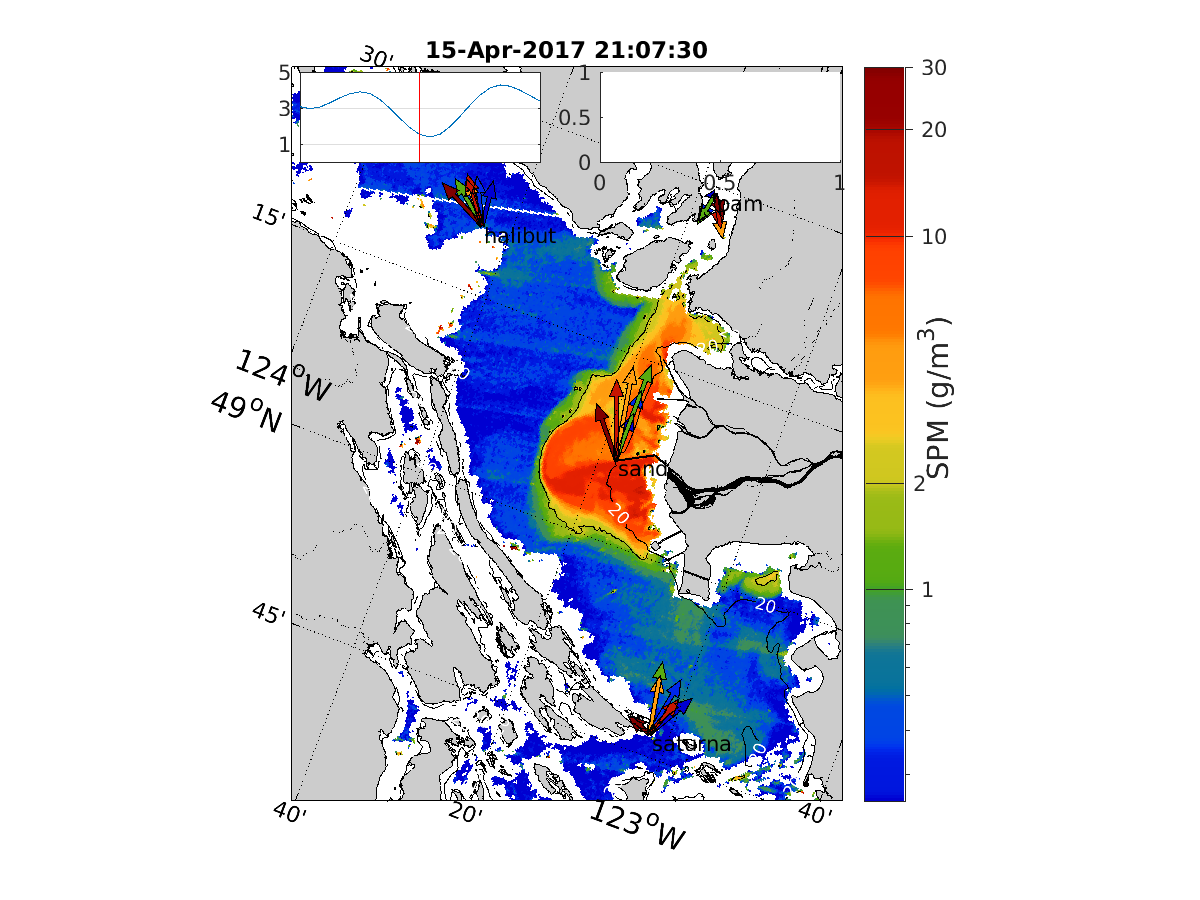

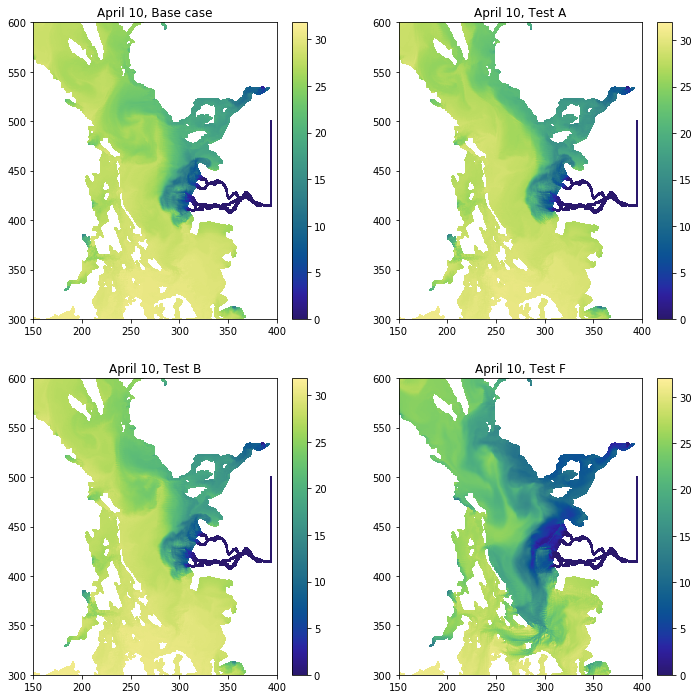

In [71]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
q = plot_plume_salinity(apr10base, ax[0,0])
q.set_title('April 10, Base case')
w = plot_plume_salinity(apr10testa, ax[0,1])
w.set_title('April 10, Test A')
e = plot_plume_salinity(apr10testb, ax[1,0])
e.set_title('April 10, Test B')
r = plot_plume_salinity(f, ax[1,1])
r.set_title('April 10, Test F')
Image('/home/vdo/Downloads/plume1.png')

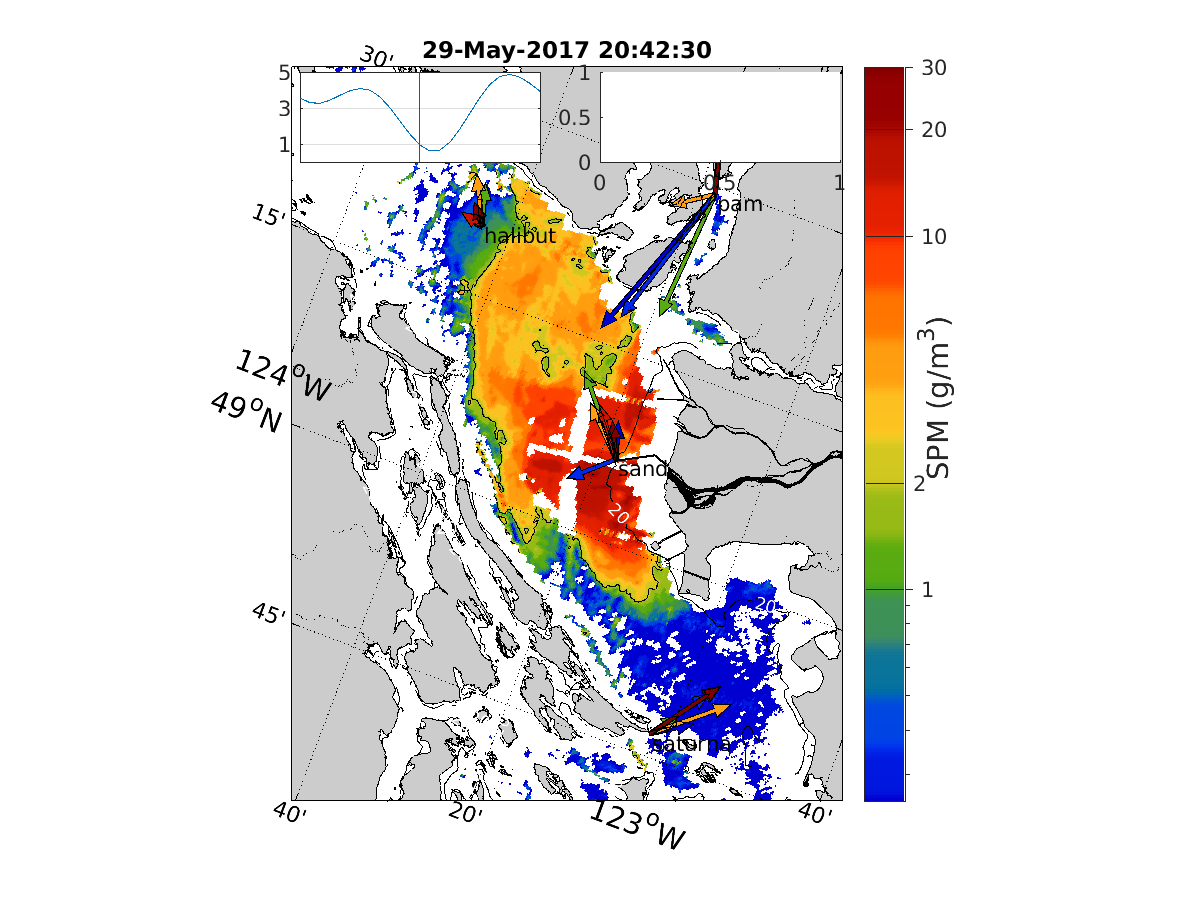

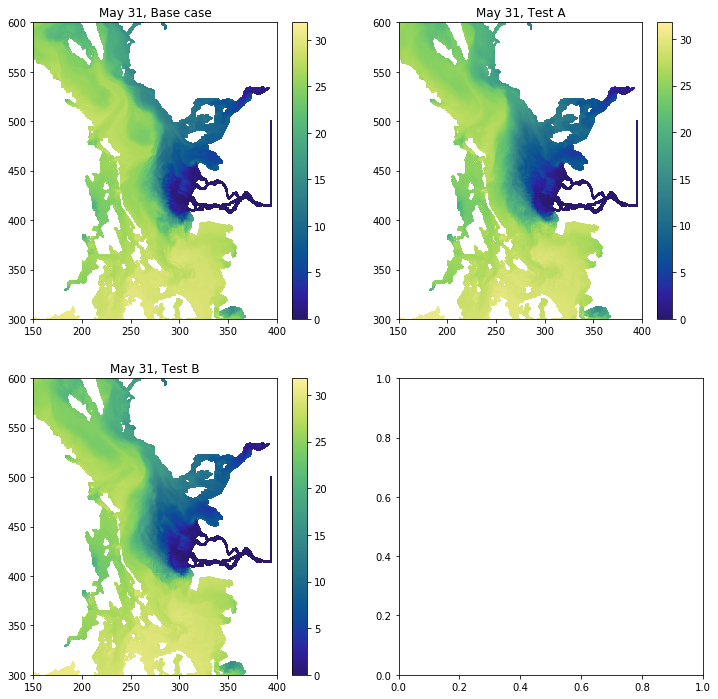

In [72]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
y = plot_plume_salinity(may31base, ax[0,0])
y.set_title('May 31, Base case')
u = plot_plume_salinity(may31testa, ax[0,1])
u.set_title('May 31, Test A')
i = plot_plume_salinity(may31testb, ax[1,0])
i.set_title('May 31, Test B')
Image('/home/vdo/Downloads/plume2.png')